#### Import packages

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cmx
import scanpy.external as sce
import itertools
from scipy import stats
from scipy.stats import shapiro, kstest, levene, bartlett, kruskal, mannwhitneyu, f_oneway
import statsmodels.stats.multitest
import scipy as sp
import statsmodels.api
import seaborn as sns
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
import gseapy as gp
from matplotlib_venn import venn3
from gseapy import Biomart, barplot, dotplot
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib_venn import venn2
from matplotlib.lines import Line2D

In [2]:
print(gp.__version__)

1.1.4


#### Diameter plots

In [4]:
count_diam = pd.read_excel(r'C:\Users\momenzadeha\OneDrive - Cedars-Sinai Health System\cell_store\count_diameter.xlsx', index_col=0)

In [5]:
#drop control hela
count_diam=count_diam.drop("X:\\TimsTOF-SCP\\Data\\231214_BORA_10_16_HEK_4C_PL03\\BORA_10_16_HEK_4C_B17_RB18_1_22150.d")

In [6]:
cols_37 = [col for col in count_diam.index if '_37C' in col]
cols_196 = [col for col in count_diam.index if '_80' in col]
cols_4 = [col for col in count_diam.index if '_4C' in col]

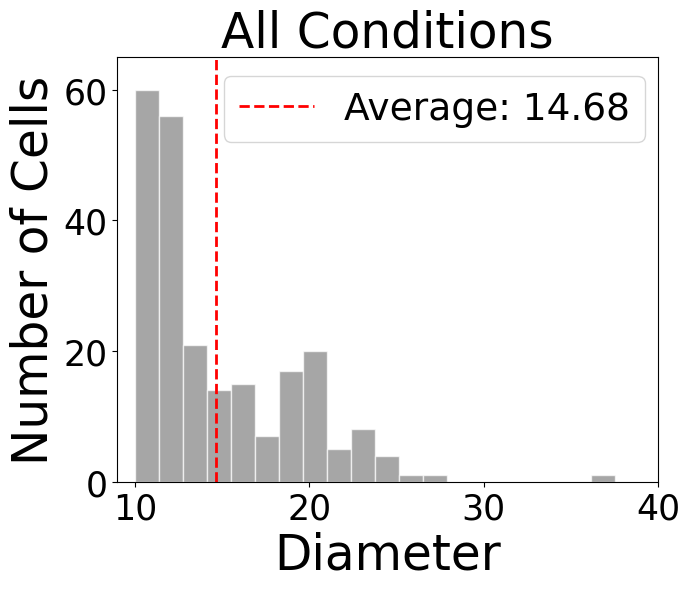

In [7]:
# Data
data = count_diam[['Diameter']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='grey', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Diameter', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('All Conditions', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=27,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(9, 40)
plt.ylim(0, 65)

# Save plot
plt.savefig('figures/Fig1B_all.svg', bbox_inches='tight')

# Show plot
plt.tight_layout()
plt.show()

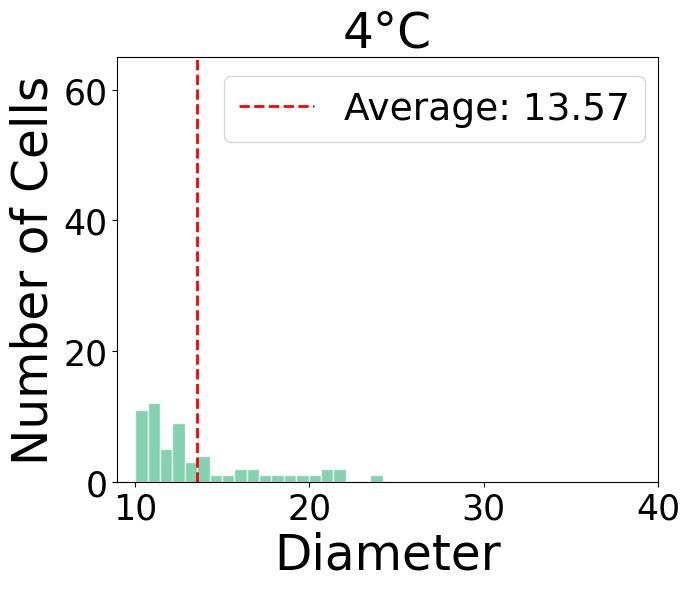

In [8]:
# Data
data = count_diam.loc[cols_4, ['Diameter']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#51BF90', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Diameter', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('4\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=27,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(9, 40)
plt.ylim(0, 65)
plt.savefig('figures/Fig1B_4.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()

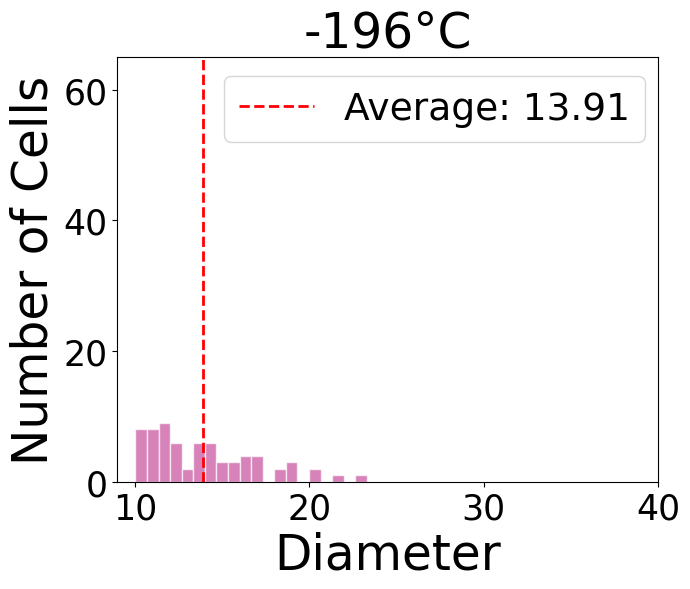

In [9]:
# Data
data = count_diam.loc[cols_196, ['Diameter']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#C64E9C', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Diameter', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('-196\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=27,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(9, 40)
plt.ylim(0, 65)
plt.savefig('figures/Fig1B_196.svg',bbox_inches='tight')
# Show plot
plt.tight_layout()
plt.show()

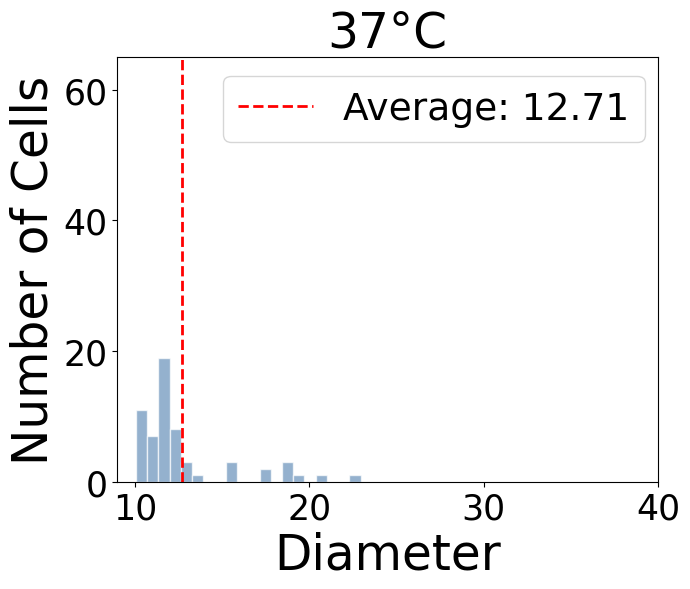

In [10]:
# Data
data = count_diam.loc[cols_37, ['Diameter']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#6791BA', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Diameter', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('37\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=27,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(9, 40)
plt.ylim(0, 65)
plt.savefig('figures/Fig1B_37.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()


In [11]:
stat, p = shapiro(count_diam.loc[cols_37, ['Diameter']].values.flatten())  # Replace 'data' with your dataset
print(f"Shapiro-Wilk Test p-value: {p}")
stat, p = levene(count_diam.loc[cols_37, ['Diameter']].values.flatten(), count_diam.loc[cols_196, ['Diameter']].values.flatten(), count_diam.loc[cols_4, ['Diameter']].values.flatten())
print(f"Levene's Test p-value: {p}")
stat, p = kruskal(count_diam.loc[cols_37, ['Diameter']].values.flatten(), count_diam.loc[cols_196, ['Diameter']].values.flatten(), count_diam.loc[cols_4, ['Diameter']].values.flatten())
print(f"Kruskal-Wallis Test p-value: {p}")

Shapiro-Wilk Test p-value: 5.224299907509273e-09
Levene's Test p-value: 0.1222659094606777
Kruskal-Wallis Test p-value: 0.05893023728161233


#### Elongation plots

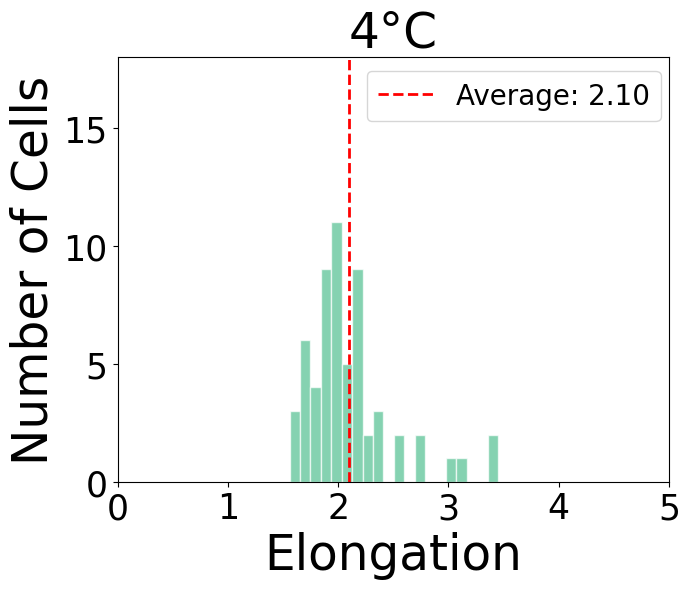

In [19]:
# Data
data = count_diam.loc[cols_4, ['Elongation']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#51BF90', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Elongation', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('4\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(0, 5)
plt.ylim(0, 18)
plt.savefig('figures/SF1_4.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()

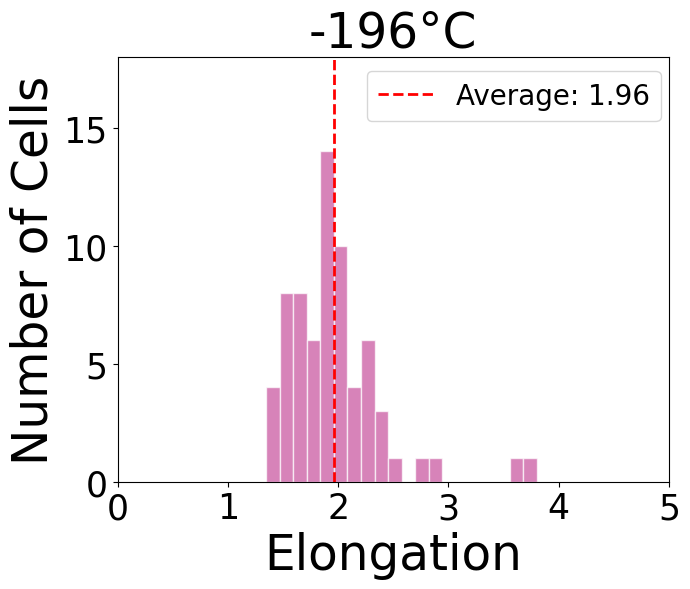

In [18]:
# Data
data = count_diam.loc[cols_196, ['Elongation']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#C64E9C', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Elongation', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('-196\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

plt.xlim(0, 5)
plt.ylim(0, 18)
plt.savefig('figures/SF1_196.svg',bbox_inches='tight')
# Show plot
plt.tight_layout()
plt.show()

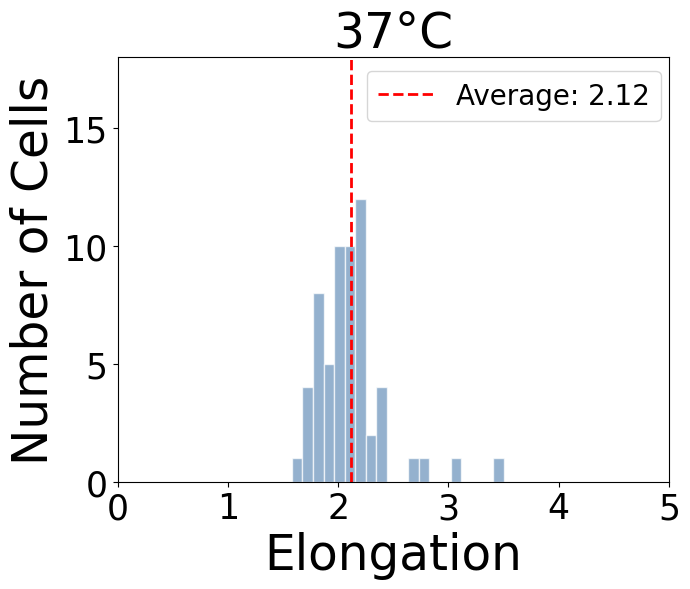

In [20]:
# Data
data = count_diam.loc[cols_37, ['Elongation']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#6791BA', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Elongation', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('37\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

plt.xlim(0, 5)
plt.ylim(0, 18)
plt.savefig('figures/SF1_37.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()


In [22]:
stat, p = shapiro(count_diam.loc[cols_37, ['Elongation']].values.flatten())  # Replace 'data' with your dataset
print(f"Shapiro-Wilk Test p-value: {p}")
stat, p = levene(count_diam.loc[cols_37, ['Elongation']].values.flatten(), count_diam.loc[cols_196, ['Elongation']].values.flatten(), count_diam.loc[cols_4, ['Elongation']].values.flatten())
print(f"Levene's Test p-value: {p}")
stat, p = kruskal(count_diam.loc[cols_37, ['Elongation']].values.flatten(), count_diam.loc[cols_196, ['Elongation']].values.flatten(), count_diam.loc[cols_4, ['Elongation']].values.flatten())
print(f"Kruskal-Wallis Test p-value: {p}")

Shapiro-Wilk Test p-value: 2.4379809810281094e-06
Levene's Test p-value: 0.2942796654243457
Kruskal-Wallis Test p-value: 0.001957242020129905


#### Circularity plots

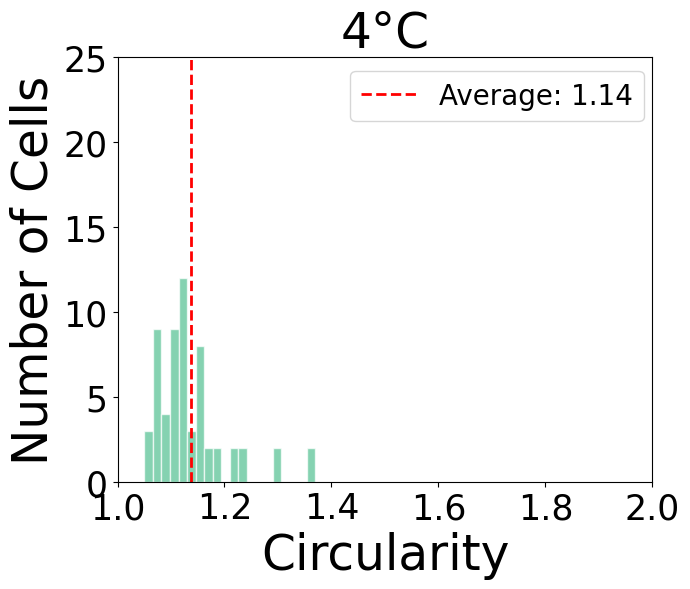

In [28]:
# Data
data = count_diam.loc[cols_4, ['Circularity']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#51BF90', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Circularity', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('4\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(1, 2)
plt.ylim(0, 25)
plt.savefig('figures/SF2_4.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()

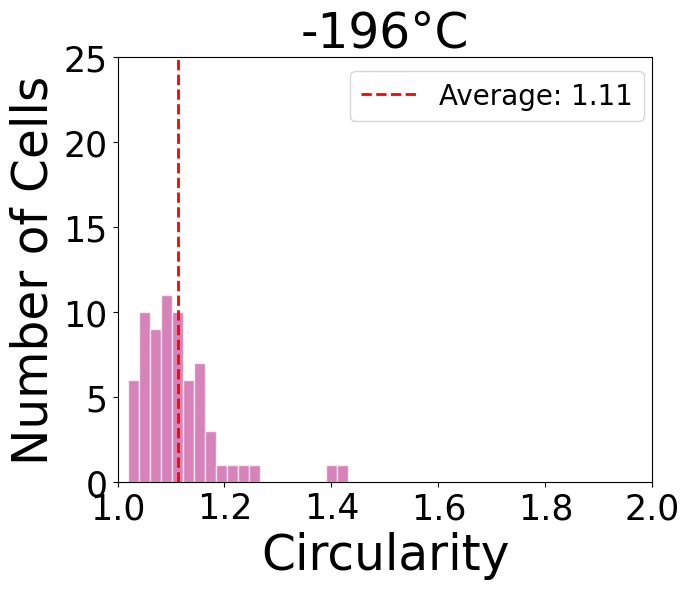

In [29]:
# Data
data = count_diam.loc[cols_196, ['Circularity']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#C64E9C', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Circularity', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('-196\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(1, 2)
plt.ylim(0, 25)
plt.savefig('figures/SF2_196.svg',bbox_inches='tight')
# Show plot
plt.tight_layout()
plt.show()

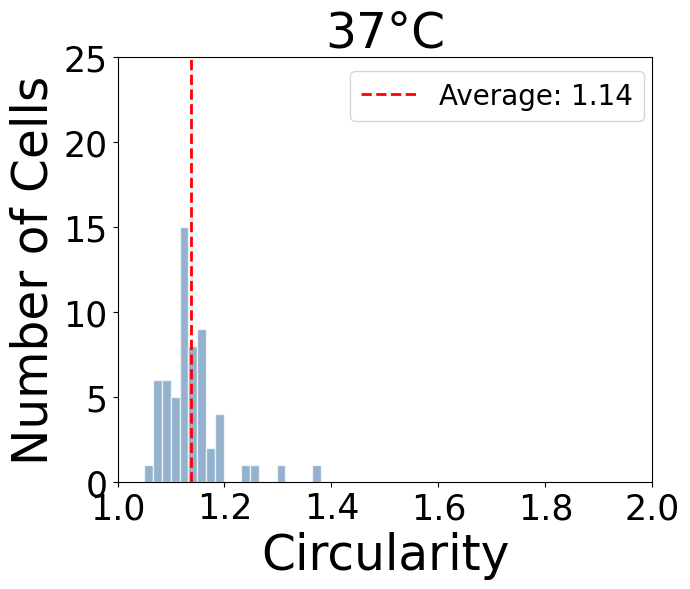

In [30]:
# Data
data = count_diam.loc[cols_37, ['Circularity']].values.flatten()

# Calculate the average
average = np.mean(data)

# Plotting the histogram
plt.figure(figsize=(7, 6))
counts, bins, patches = plt.hist(data, bins=20, color='#6791BA', edgecolor='white', alpha=0.7)  # Raw counts

# Add vertical line for the average
plt.axvline(average, color='red', linestyle='--', linewidth=2, label=f'Average: {average:.2f}')

# Add labels and title
plt.xlabel('Circularity', fontsize=35)
plt.ylabel('Number of Cells', fontsize=35)
plt.title('37\u00b0C', fontsize=35)

# Add legend with increased box size and spacing
plt.legend(
    fontsize=20,  # Font size of legend text
    loc='upper right',  # Position of the legend
    bbox_to_anchor=(1.01, 1),  # Adjust position and size of legend box
    title_fontsize=18,  # Font size of the legend title
    borderaxespad=0.5,  # Padding between the legend and the axes
    frameon=True,  # Add a border around the legend box
)

# Adjust x and y-axis ticks size
plt.tick_params(axis='both', labelsize=25)

# Set axis limits
plt.xlim(1, 2)
plt.ylim(0, 25)
plt.savefig('figures/SF2_37.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()


In [33]:
stat, p = kruskal(count_diam.loc[cols_37, ['Circularity']].values, count_diam.loc[cols_196, ['Circularity']].values, count_diam.loc[cols_4, ['Circularity']].values)
print(f"Kruskal-Wallis Test p-value: {p}")

Kruskal-Wallis Test p-value: [0.00169603]


#### Define functions

In [34]:
def create_enrichment_plot(gene_list, save_path, figsize=(4, 8)):
    # Run enrichment analysis
    enr = gp.enrichr(
        gene_list=gene_list,
        gene_sets=['MSigDB_Hallmark_2020', 'KEGG_2021_Human', 'GO_Molecular_Function_2023',
                   'GO_Biological_Process_2023', 'Reactome_2022'],
        organism='human', 
        outdir=None
    )

    # Customize plot appearance
    plt.rcParams.update({
        'axes.labelsize': 20,  
        'xtick.labelsize': 20, 
        'ytick.labelsize': 15,  
    })

    # Create barplot
    ax = barplot(
        enr.results,
        column="Adjusted P-value",
        group='Gene_set', 
        size=15,
        top_term=5,
        figsize=figsize,
        color={
            'KEGG_2021_Human': 'red',
            'MSigDB_Hallmark_2020': 'black',
            'GO_Molecular_Function_2023': 'green',
            'GO_Biological_Process_2023': 'orange',
            'Reactome_2022': 'purple'
        }
    )

    # Customize axis and legend font sizes
    ax.set_xlabel('-Log10(adj. pval)', fontsize=30)
    for tick in ax.get_xticklabels():
        tick.set_fontsize(25)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(20)

    # Adjust legend font size and make it larger
    legend = ax.get_legend()
    if legend:
        legend.set_title("Gene Sets", prop={'size': 24})
        for text in legend.get_texts():
            text.set_fontsize(22)

    # Save plot with specified file path
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    return enr

def calculate_differential_expression(data, group_col0, group_col1, group_col0_value, group_col1_value, group_col0_label, group_col1_label,
                                      group0_mean, group1_mean,LogFC_name, logfc_threshold=1, 
                                      neg_log10_adj_pval_threshold=2):
    # Helper function to calculate average of a list with NaN return if empty
    def average(lst):
        return sum(lst) / len(lst) if lst else np.nan  

    # Prepare data for each group
    group_0 = data.to_df().loc[data.obs[data.obs[group_col0] == group_col0_value].index]
    group_0_df = pd.DataFrame(group_0).rename(columns={0: 'value'}).T.reset_index()
    group_0_melt = group_0_df.melt(id_vars=['Genes'], value_vars=group_0_df.columns[1:].tolist()).assign(Group=group_col0_label)
    
    group_1 = data.to_df().loc[data.obs[data.obs[group_col1] == group_col1_value].index]
    group_1_df = pd.DataFrame(group_1).rename(columns={0: 'value'}).T.reset_index()
    group_1_melt = group_1_df.melt(id_vars=['Genes'], value_vars=group_1_df.columns[1:].tolist()).assign(Group=group_col1_label)
    
    # Combine both groups into one DataFrame
    concat_cond = pd.concat([group_0_melt, group_1_melt]).reset_index(drop=True)

    # Initialize lists to store results
    pvalues = []
    protein_names = []
    _0_mean = []
    _1_mean = []

    # Calculate means and p-values
    for gene in concat_cond['Genes'].unique():
        tempdf = concat_cond[concat_cond['Genes'] == gene]
        
        # Filter out zero values for each group
        coh0_values = [value for value in tempdf[tempdf.Group == group_col0_label]['value'] if value != 0]
        coh1_values = [value for value in tempdf[tempdf.Group == group_col1_label]['value'] if value != 0]

        _0_mean.append(average(coh0_values))
        _1_mean.append(average(coh1_values))

        # Conduct t-test if both groups have sufficient values
        if len(coh0_values) < 4 or len(coh1_values) < 4:
            pvalues.append(np.nan)
        else:
            t_val, p_val = stats.ttest_ind(coh0_values, coh1_values, equal_var=False)
            pvalues.append(p_val)

        protein_names.append(gene)

    # Create DataFrame with calculated statistics
    pval_df = pd.DataFrame({
        'genes': protein_names,
        group0_mean: _0_mean,
        group1_mean: _1_mean,
        'pvals': pvalues
    }).dropna()

    # Apply Benjamini-Hochberg correction
    _, adj_pvals, _, _ = statsmodels.stats.multitest.multipletests(pval_df['pvals'], alpha=0.05, method="fdr_bh")
    pval_df['adj_pval'] = adj_pvals
    pval_df[LogFC_name] = pval_df[group0_mean] - pval_df[group1_mean]
    pval_df['neg_log10_adj_pval'] = -np.log10(pval_df['adj_pval'])

    # Filter upregulated genes based on log fold change and adjusted p-value threshold
    group_0_up = pval_df[(pval_df[LogFC_name] > logfc_threshold) & (pval_df['neg_log10_adj_pval'] > neg_log10_adj_pval_threshold)].assign(Group=f'upregulated in {group_col0_label}')
    group_1_up = pval_df[(pval_df[LogFC_name] < -logfc_threshold) & (pval_df['neg_log10_adj_pval'] > neg_log10_adj_pval_threshold)].assign(Group=f'upregulated in {group_col1_label}')

    # Concatenate upregulated genes and create gene list
    _0_1_DEG = pd.concat([group_0_up, group_1_up])
    _0_1_DEG_genelist = _0_1_DEG['genes'].tolist()
    return pval_df, _0_1_DEG, _0_1_DEG_genelist

def plot_differential_expression(deg_df, logfc_col, adj_pval_col='adj_pval', 
                                  down_label='Up-regulated', up_label='Up-regulated', 
                                  output_path='figures/differential_expression.svg'):
    """
    Plot differential expression results.

    Parameters:
    - deg_df: DataFrame containing differential expression results with gene names as index.
    - logfc_col: Column name for Log Fold Change.
    - adj_pval_col: Column name for adjusted p-values.
    - down_label: Label for downregulated genes.
    - up_label: Label for upregulated genes.
    - output_path: Path to save the figure.
    """
    plt.figure(figsize=(6, 5))

# Scatter plot for not significant genes (between -1 and 1)
    not_significant = deg_df[(deg_df[logfc_col] >= -1) & (deg_df[logfc_col] <= 1)]
    plt.scatter(x=not_significant[logfc_col], 
                y=not_significant[adj_pval_col].apply(lambda x: -np.log10(x)), 
                s=50, label="Not significant", color='black')

    # Define downregulated and upregulated genes
    down = deg_df[(deg_df[logfc_col] < -1) & (deg_df[adj_pval_col] <= 0.01)]
    up = deg_df[(deg_df[logfc_col] >= 1 ) & (deg_df[adj_pval_col] <= 0.01)]

    # Scatter plots for downregulated and upregulated genes
    plt.scatter(x=down[logfc_col], 
                y=down[adj_pval_col].apply(lambda x: -np.log10(x)), 
                s=50, label=f"{down_label} genes", color="red")
    plt.scatter(x=up[logfc_col], 
                y=up[adj_pval_col].apply(lambda x: -np.log10(x)), 
                s=50, label=f"{up_label} genes", color="green")

    # Add reference lines
    plt.axvline(1, color="grey", linestyle="--")
    plt.axvline(-1, color="grey", linestyle="--")
    plt.axhline(2, color="grey", linestyle="--")

    # Set legend and labels
    plt.legend(fontsize=15)
    plt.ylabel("-Log10(adj. pval)", fontsize=30)
    plt.xlabel("Log2(FC)", fontsize=30)
    plt.xticks(fontweight='light', fontsize=25)
    plt.yticks(fontweight='light', fontsize=30)

    # Grid and legend settings
    plt.grid(False)
    plt.legend(fontsize=15, markerscale=1, loc='best')
    
    plt.ylim(0,35)
    plt.xlim(-2.5,2.5)
    
    # Save the figure
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

#### Read in files and pre-process

In [35]:
pg_matrix = pd.read_table(r'C:\Users\momenzadeha\OneDrive - Cedars-Sinai Health System\cell_store\report2.pg_matrix.tsv')
gene_prot_map = pd.read_excel(r'C:\Users\momenzadeha\OneDrive - Cedars-Sinai Health System\cell_store\idmapping_cellstore.xlsx')
gene_prot_map=gene_prot_map.rename({'From':'Protein.Ids'},axis=1)
pg_gene_matrix=gene_prot_map.merge(pg_matrix, how='inner',on='Protein.Ids')
pg_gene_matrix.drop(['Protein.Names','Protein.Ids','First.Protein.Description','Protein.Group','Genes'],inplace=True,axis=1)
#drop hela control
pg_gene_matrix.drop(columns=["X:\\TimsTOF-SCP\\Data\\231214_BORA_10_16_HEK_4C_PL03\\BORA_10_16_HEK_4C_B17_RB18_1_22150.d"], inplace=True)

In [36]:
# fill Na's with zero
pg_gene_matrix.fillna(0, inplace=True)
pg_gene_matrix.reset_index(drop=True, inplace=True)
cols_37 = [col for col in pg_gene_matrix.columns if '_37C' in col]
cols_196 = [col for col in pg_gene_matrix.columns if '_80' in col]
cols_4 = [col for col in pg_gene_matrix.columns if '_4C' in col]
pg_gene_matrix=pg_gene_matrix.rename({'Gene Names (primary)':'Genes'},axis=1)
pg_gene_matrix=pg_gene_matrix.set_index('Genes').T
_37C_df=pg_gene_matrix.loc[cols_37].assign(Group='37C')
_196_df=pg_gene_matrix.loc[cols_196].assign(Group='-196C')
_4C_df=pg_gene_matrix.loc[cols_4].assign(Group='4C')
label_gene=pd.concat([_37C_df,_196_df,_4C_df])

In [37]:
# extract column names
_37_column_names = [x for x in label_gene.T.columns if "_37C" in x] 
_196_column_names = [x for x in label_gene.T.columns if "_80" in x]
_4_column_names = [x for x in label_gene.T.columns if "_4C" in x]

#### Make anndata

In [38]:
data = ad.AnnData(label_gene.iloc[:,:-1])
data.obs["group"] = label_gene["Group"]
sc.pp.calculate_qc_metrics(data, inplace=True)
data.var_names_make_unique()

C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\scanpy\preprocessing\_qc.py:432: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


#### Boxplot before normalization

In [39]:
ann_37C=data.to_df().loc[cols_37]
ann_37C=pd.melt(ann_37C.T, value_vars=ann_37C.T.columns)
ann_37C = ann_37C[ann_37C['value'] != 0]
ann_196C=data.to_df().loc[cols_196]
ann_196C=pd.melt(ann_196C.T, value_vars=ann_196C.T.columns)
ann_196C = ann_196C[ann_196C['value'] != 0]
ann_4C=data.to_df().loc[cols_4]
ann_4C=pd.melt(ann_4C.T, value_vars=ann_4C.T.columns)
ann_4C = ann_4C[ann_4C['value'] != 0]
ann_37C['value']=np.log2(ann_37C['value'])
ann_196C['value']=np.log2(ann_196C['value'])
ann_4C['value']=np.log2(ann_4C['value'])

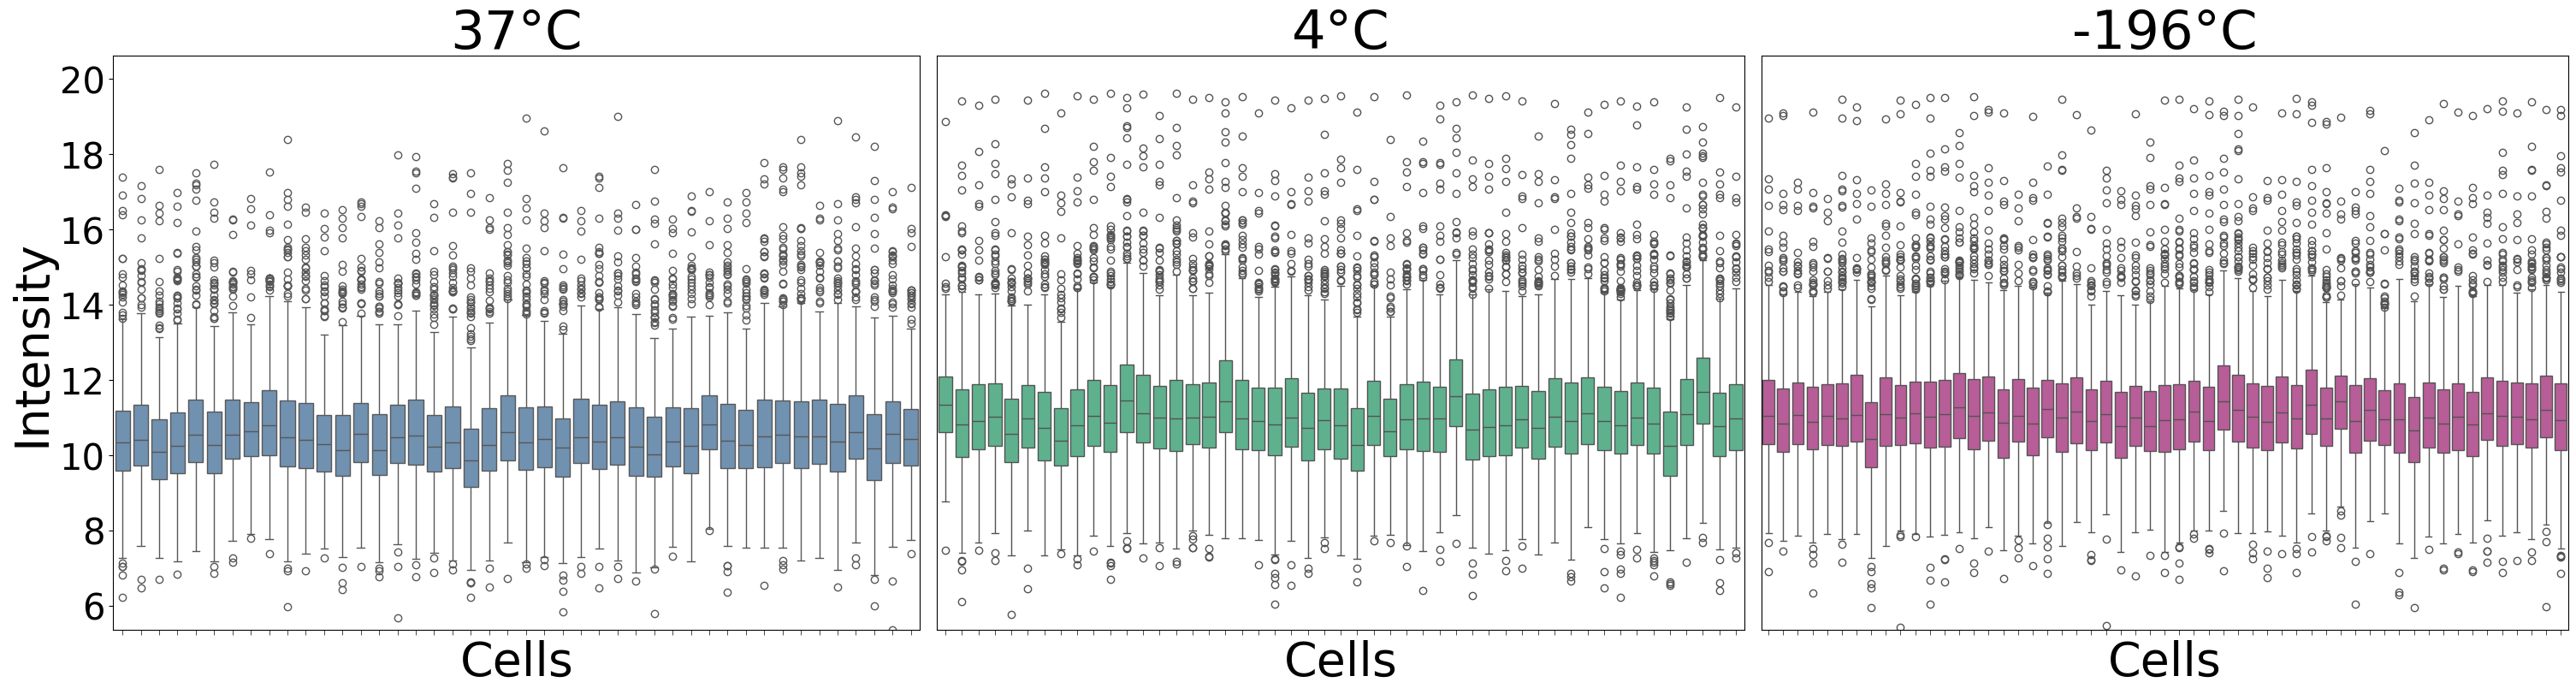

In [41]:
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 8), constrained_layout=True)

# Plot for 37°C
ax1 = sns.boxplot(ann_37C, x='variable', y='value', ax=axes[0], color='#6791BA')
axes[0].set_title('37\u00b0C', fontsize=45)
ax1.tick_params(axis='x', width=0.5, length=4)
ax1.tick_params(labelbottom=False)
ax1.set_xlabel('Cells', fontsize=40)
ax1.set_ylabel('Intensity', fontsize=40)

# Plot for 4°C
ax4 = sns.boxplot(ann_4C, x='variable', y='value', ax=axes[1], color='#51BF90')
axes[1].set_title('4\u00b0C', fontsize=45)
ax4.tick_params(axis='x', width=0.5, length=4)
ax4.tick_params(labelbottom=False)
ax4.set_xlabel('Cells', fontsize=40)
ax4.set_ylabel('')
ax4.axes.get_yaxis().set_visible(False)

# Plot for -196°C
ax3 = sns.boxplot(ann_196C, x='variable', y='value', ax=axes[2], color='#C64E9C')
axes[2].set_title('-196\u00b0C', fontsize=45)
ax3.tick_params(axis='x', width=0.5, length=4)
ax3.tick_params(labelbottom=False)
ax3.set_xlabel('Cells', fontsize=40)
ax3.set_ylabel('')
ax3.axes.get_yaxis().set_visible(False)

# Set the same y-axis limits for all plots
y_min = min(ann_37C['value'].min(), ann_4C['value'].min(), ann_196C['value'].min())
y_max = max(ann_37C['value'].max()+1, ann_4C['value'].max()+1, ann_196C['value'].max()+1)
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.savefig('figures/SF3.svg',bbox_inches='tight')
# Show the plot
plt.show()

#### Filter and normalize

In [42]:
sc.pp.filter_cells(data, min_genes=200)
sc.pp.filter_genes(data, min_cells=10)

In [43]:
data.to_df().shape

(148, 1245)

In [44]:
cols_37 = [col for col in data.to_df().index if '_37C' in col]
cols_196 = [col for col in data.to_df().index if '_80' in col]
cols_4 = [col for col in data.to_df().index if '_4C' in col]

#### venn diagram

In [110]:
binary_data = data.to_df().loc[cols_37].applymap(lambda x: 1 if x != 0 else 0)
non_zero_37 = binary_data.columns[binary_data.sum() > 0].tolist()
zero_37 = binary_data.columns[binary_data.sum() == 0].tolist()

In [111]:
binary_data = data.to_df().loc[cols_4].applymap(lambda x: 1 if x != 0 else 0)
non_zero_4 = binary_data.columns[binary_data.sum() > 0].tolist()
zero_4 = binary_data.columns[binary_data.sum() == 0].tolist()

In [112]:
binary_data = data.to_df().loc[cols_196].applymap(lambda x: 1 if x != 0 else 0)
non_zero_196 = binary_data.columns[binary_data.sum() > 0].tolist()
zero_196 = binary_data.columns[binary_data.sum() == 0].tolist()

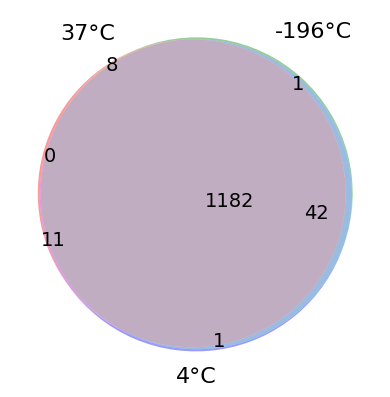

In [113]:
venn_diagram = venn3([set(non_zero_37), set(non_zero_196), set(non_zero_4)], set_labels=('37\u00b0C', '-196\u00b0C', '4\u00b0C'))

for text in venn_diagram.set_labels:
    if text: 
        text.set_fontsize(16)

for text in venn_diagram.subset_labels:
    if text:  
        text.set_fontsize(14)
plt.savefig('figures/venn_nonzero.svg', bbox_inches='tight')

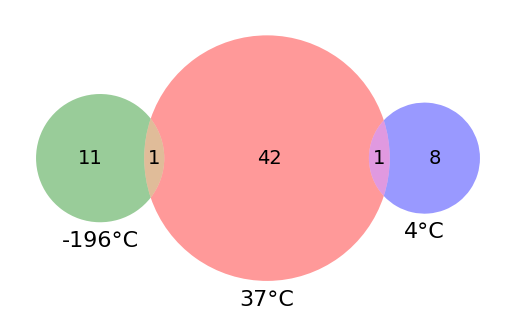

In [27]:
venn_diagram = venn3([set(zero_37), set(zero_196), set(zero_4)], set_labels=('37\u00b0C', '-196\u00b0C', '4\u00b0C'))

for text in venn_diagram.set_labels:
    if text:  
        text.set_fontsize(16)

for text in venn_diagram.subset_labels:
    if text:  
        text.set_fontsize(14)
plt.savefig('figures/venn_zero.svg', bbox_inches='tight')

#### histograms prior to norm

In [106]:
x_min = min(data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count().min(), data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().min(), data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count().min())

In [107]:
x_max = min(data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count().max(), data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().max(), data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count().max())

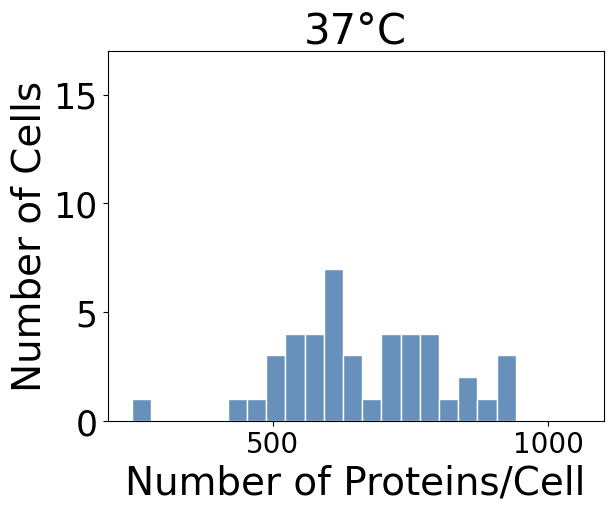

In [108]:
plt.hist(data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count(),
         edgecolor="white",color='#6791BA', bins=20)
plt.xlabel('Number of Proteins/Cell',fontsize=28)
plt.ylabel('Number of Cells',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.title('37\u00b0C',fontsize=30)
plt.xlim(200,1100)
plt.ylim(0,17)
plt.grid(False)
plt.savefig('figures/Fig1C_37C.svg',bbox_inches='tight')
plt.show()

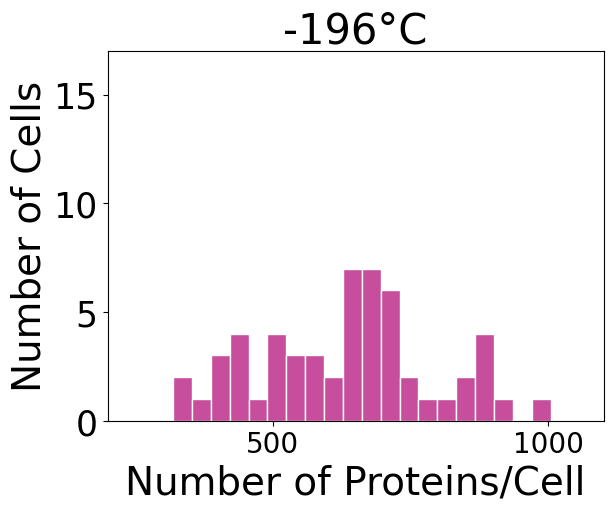

In [33]:
plt.hist(data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count(),
         edgecolor='white',color='#C64E9C', bins=20)
plt.xlabel('Number of Proteins/Cell',fontsize=28)
plt.ylabel('Number of Cells',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.title('-196\u00b0C',fontsize=30)
plt.ylim(0,17)
plt.xlim(200,1100)
plt.savefig('figures/Fig1C_80C.svg',bbox_inches='tight')
plt.show()

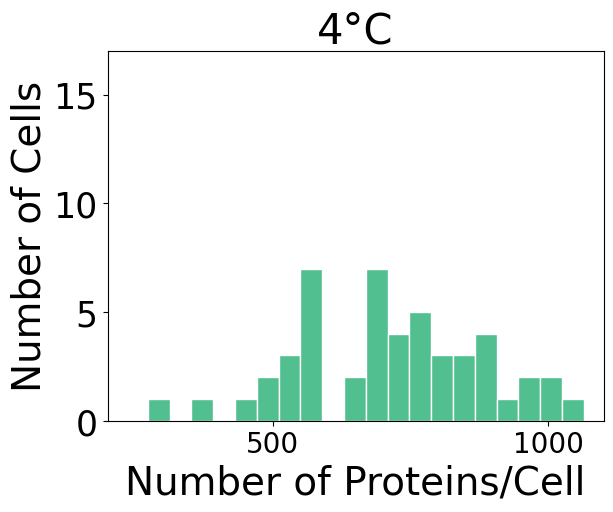

In [34]:
plt.hist(data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count(),
         edgecolor='white',color='#51BF90', bins=20)
plt.xlabel('Number of Proteins/Cell',fontsize=28)
plt.ylabel('Number of Cells',fontsize=28)

plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.ylim(0,17)
plt.title('4\u00b0C',fontsize=30)
plt.xlim(200,1100)
plt.savefig('figures/Fig1C_4C.svg',bbox_inches='tight')
plt.show()

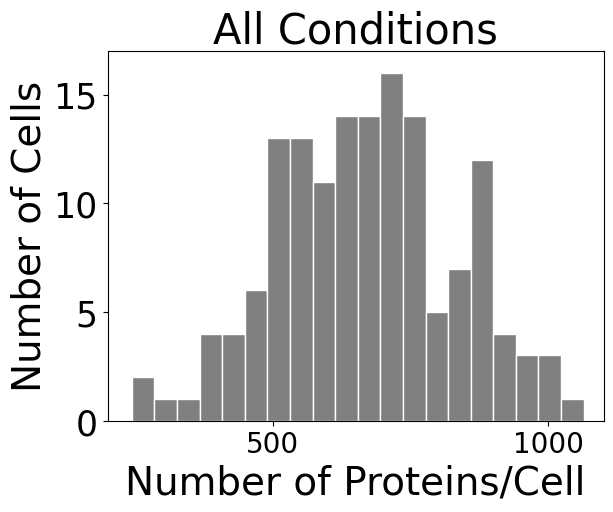

In [35]:
plt.hist(data.to_df().T[data.to_df().T>0].count(),edgecolor='white',color='grey', bins=20)
plt.xlabel('Number of Proteins/Cell',fontsize=28)
plt.ylabel('Number of Cells',fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)

plt.ylim(0,17)
plt.xlim(200,1100)
#plt.yticks(y_ticks)
plt.title('All Conditions',fontsize=30)
plt.savefig('figures/Fig1C_all.svg',bbox_inches='tight')
plt.show()

In [109]:
data.to_df().T[data.to_df().T>0].

667.7094594594595

In [36]:
data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().values.mean()

712.0408163265306

In [37]:
data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().values.std()

168.86765246284796

In [38]:
data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count().values.mean()

662.6363636363636

In [39]:
data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count().values.std()

144.72797224591113

In [40]:
data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count().values.mean()

632.2727272727273

In [41]:
data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count().values.std()

158.99210438319994

In [87]:
stat, p = shapiro(data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().values)  # Replace 'data' with your dataset
print(f"Shapiro-Wilk Test p-value: {p}")

Shapiro-Wilk Test p-value: 0.9493142317815721


In [42]:
group1 = data.to_df().T[cols_4][data.to_df().T[cols_4]>0].count().values
group2 = data.to_df().T[cols_37][data.to_df().T[cols_37]>0].count().values
group3 = data.to_df().T[cols_196][data.to_df().T[cols_196]>0].count().values
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)
print("p-value:", p_value)

p-value: 0.041444756237960415


#### normalization

In [45]:
sc.pp.normalize_total(data, target_sum=1e4)
sc.pp.log1p(data, base=2)
sc.pp.regress_out(data, ['total_counts'])
sc.pp.scale(data, max_value=10)

In [46]:
ss = StandardScaler()
data.X = ss.fit_transform(data.to_df().T).T

##### boxplot after filtering

In [47]:
cols_37 = [col for col in data.to_df().index if '_37C' in col]
cols_196 = [col for col in data.to_df().index if '_80' in col]
cols_4 = [col for col in data.to_df().index if '_4C' in col]

In [48]:
ann_37C=data.to_df().loc[cols_37]
ann_37C=pd.melt(ann_37C.T, value_vars=ann_37C.T.columns)
ann_37C = ann_37C[ann_37C['value'] != 0]
ann_196C=data.to_df().loc[cols_196]
ann_196C=pd.melt(ann_196C.T, value_vars=ann_196C.T.columns)
ann_196C = ann_196C[ann_196C['value'] != 0]
ann_4C=data.to_df().loc[cols_4]
ann_4C=pd.melt(ann_4C.T, value_vars=ann_4C.T.columns)
ann_4C = ann_4C[ann_4C['value'] != 0]

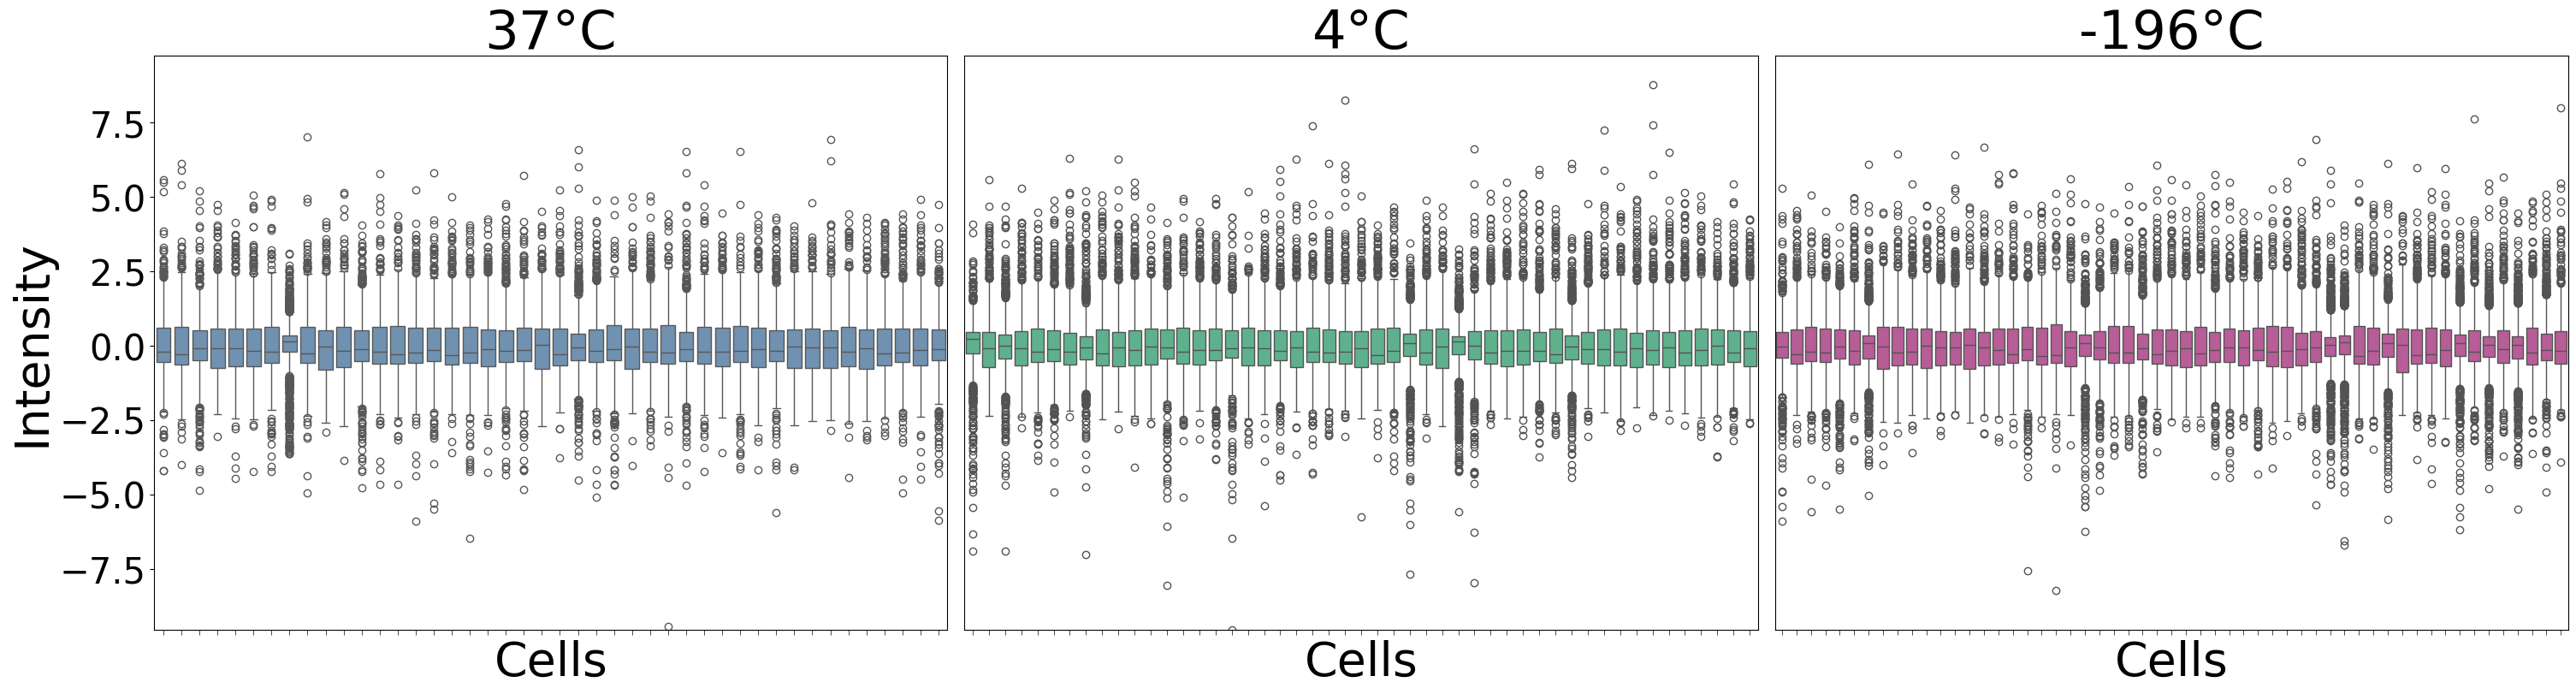

In [49]:
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 8), constrained_layout=True)

# Plot for 37°C
ax1 = sns.boxplot(ann_37C, x='variable', y='value', ax=axes[0], color='#6791BA')
axes[0].set_title('37\u00b0C', fontsize=45)
ax1.tick_params(axis='x', width=0.5, length=4)
ax1.tick_params(labelbottom=False)
ax1.set_xlabel('Cells', fontsize=40)
ax1.set_ylabel('Intensity', fontsize=40)

# Plot for 4°C
ax4 = sns.boxplot(ann_4C, x='variable', y='value', ax=axes[1], color='#51BF90')
axes[1].set_title('4\u00b0C', fontsize=45)
ax4.tick_params(axis='x', width=0.5, length=4)
ax4.tick_params(labelbottom=False)
ax4.set_xlabel('Cells', fontsize=40)
ax4.set_ylabel('')
ax4.axes.get_yaxis().set_visible(False)

# Plot for -196°C
ax3 = sns.boxplot(ann_196C, x='variable', y='value', ax=axes[2], color='#C64E9C')
axes[2].set_title('-196\u00b0C', fontsize=45)
ax3.tick_params(axis='x', width=0.5, length=4)
ax3.tick_params(labelbottom=False)
ax3.set_xlabel('Cells', fontsize=40)
ax3.set_ylabel('')
ax3.axes.get_yaxis().set_visible(False)

# Set the same y-axis limits for all plots
y_min = min(ann_37C['value'].min(), ann_4C['value'].min(), ann_196C['value'].min())
y_max = max(ann_37C['value'].max()+1, ann_4C['value'].max()+1, ann_196C['value'].max()+1)
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.savefig('figures/Fig1D.svg',bbox_inches='tight')

# Show the plot
plt.show()

#### UMAP all cells

In [50]:
sc.tl.pca(data, svd_solver='arpack')
sc.pp.neighbors(data)
sc.tl.umap(data,random_state=0)
sc.tl.leiden(data, resolution=0.2)
sc.pp.calculate_qc_metrics(data, inplace=True)

C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
data.to_df().to_csv('cell_store_SC_norm_genes.csv')
data.obs.to_csv('cell_store_SC_norm_meta.csv')

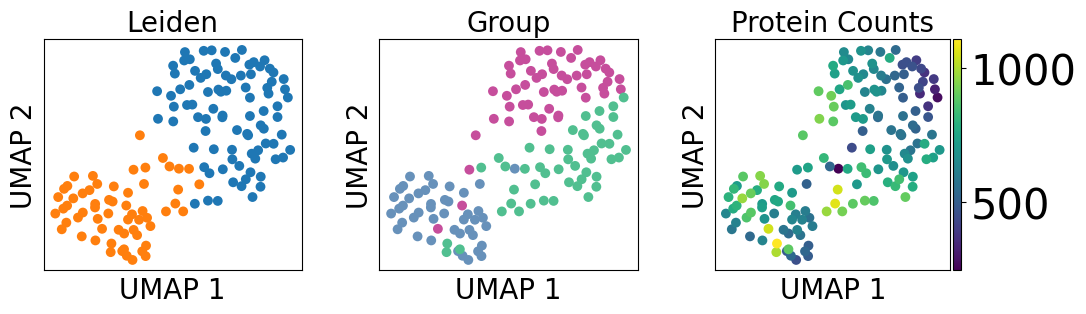

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # Removed constrained_layout

# Plotting UMAPs with different settings
sc.pl.umap(data, color=['leiden'], title=None, ax=axs[0], show=False, s=200, use_raw=False, legend_loc=None)
sc.pl.umap(data, color=['group'], title=None, ax=axs[1], palette=['#51BF90', '#6791BA', '#C64E9C'], show=False, s=200, use_raw=False, legend_loc=None)
sc.pl.umap(data, color=['n_genes'], title=None, ax=axs[2], show=False, s=200, use_raw=False, legend_loc=None)

# Customize titles with larger fonts
axs[0].set_title("Leiden", fontsize=20)  # Adjust font size for Leiden
axs[1].set_title("Group", fontsize=20)   # Adjust font size for Group
axs[2].set_title("Protein Counts", fontsize=20)  # Adjust font size for Protein Counts

# Customize axis labels and titles
for ax in axs:
    ax.set_xlabel("UMAP 1", fontsize=20)  # Add degree symbol to UMAP 1
    ax.set_ylabel("UMAP 2", fontsize=20)  # Add degree symbol to UMAP 2
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick label size

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Reduce horizontal space between plots

# Save and display the figure
plt.savefig('figures/Fig2A.svg', bbox_inches='tight')
plt.show()

In [53]:
tc_norm=data.to_df()

In [54]:
cols_37 = [col for col in tc_norm.T.columns if '_37C' in col]
cols_80 = [col for col in tc_norm.T.columns if '_80' in col]
cols_4 = [col for col in tc_norm.T.columns if '_4C' in col]

In [55]:
d = {
    '4C': np.asarray(tc_norm.loc[cols_4]),  
    '37C': np.asarray(tc_norm.loc[cols_37]),  
    '-196C': np.asarray(tc_norm.loc[cols_80])
}

# Calculate the centroids of each group
centroids = {group: np.mean(points, axis=0) for group, points in d.items()}

# Calculate distances between the centroids of each group
centroid_distances = {}
for group1, centroid1 in centroids.items():
    for group2, centroid2 in centroids.items():
        if group1 < group2:  # This condition avoids duplicate pairs and self-pairing
            distance = euclidean(centroid1, centroid2)
            centroid_distances[(group1, group2)] = distance

# Display the distances
for groups, distance in centroid_distances.items():
    print(f"Distance between {groups[0]} and {groups[1]}: {distance:.4f}")


Distance between 37C and 4C: 15.5796
Distance between -196C and 4C: 14.0014
Distance between -196C and 37C: 19.1867


#### UMAP -196C cells

C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\scanpy\preprocessing\_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


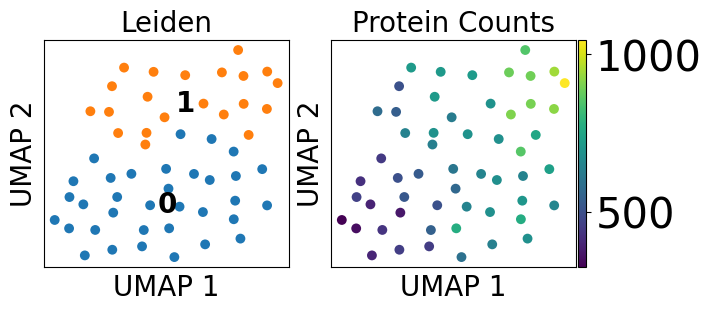

In [56]:
# Perform UMAP and clustering on the subset
data_196 = data[data.obs['group'].isin(['-196C'])]
sc.tl.pca(data_196, svd_solver='arpack')
sc.pp.neighbors(data_196)
sc.tl.umap(data_196, random_state=0)
sc.tl.leiden(data_196, resolution=0.5)
sc.pp.calculate_qc_metrics(data_196, inplace=True)

# Extract UMAP coordinates and labels
umap_coords = data_196.obsm['X_umap']
leiden_labels = data_196.obs['leiden']

# Convert to a DataFrame for easier handling
umap_df = pd.DataFrame({
    'UMAP_1': umap_coords[:, 0],
    'UMAP_2': umap_coords[:, 1],
    'leiden': leiden_labels
})

# Filter for points labeled '0' and '1'
label_0 = umap_df[umap_df['leiden'] == '0']
label_1 = umap_df[umap_df['leiden'] == '1']

# Plot UMAPs
fig, axs = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)

# UMAP plots with customized settings
sc.pl.umap(data_196, color=['leiden'], title=None, ax=axs[0], show=False, s=200, use_raw=False, legend_fontsize=20, legend_loc='on data')
sc.pl.umap(data_196, color=['n_genes'], title=None, ax=axs[1], show=False, s=200, use_raw=False)

# Customize titles with larger fonts
axs[0].set_title("Leiden", fontsize=20)
axs[1].set_title("Protein Counts", fontsize=20)

# Customize axis labels and titles
for ax in axs:
    ax.set_xlabel("UMAP 1", fontsize=20)
    ax.set_ylabel("UMAP 2", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Save and display the figure
plt.savefig('figures/UMAP_196C.svg', bbox_inches='tight')
plt.show()

##### -196C: DE gene testing leiden 0 vs 1

In [57]:
_196C_leid0_1_all, _196C_leid0_1_DEG, _196C_leid0_1_DEG_genelist = calculate_differential_expression(data_196, group_col0='leiden', group_col1='leiden', group_col0_value='0', 
                                                                                group_col1_value='1', group_col0_label='leiden 0', group_col1_label='leiden 1',
                                                                                group0_mean='leiden0_mean', group1_mean='leiden1_mean',
                                                                                LogFC_name='leid0-leid1_LogFC', logfc_threshold=1, neg_log10_adj_pval_threshold=2)

In [58]:
_196C_leid0_1_DEG.Group.value_counts()

Group
upregulated in leiden 0    15
upregulated in leiden 1     7
Name: count, dtype: int64

In [27]:
_196C_leid0_1_DEG.to_csv('_196C_leid0_1_DEG.csv')

##### Pathway analysis

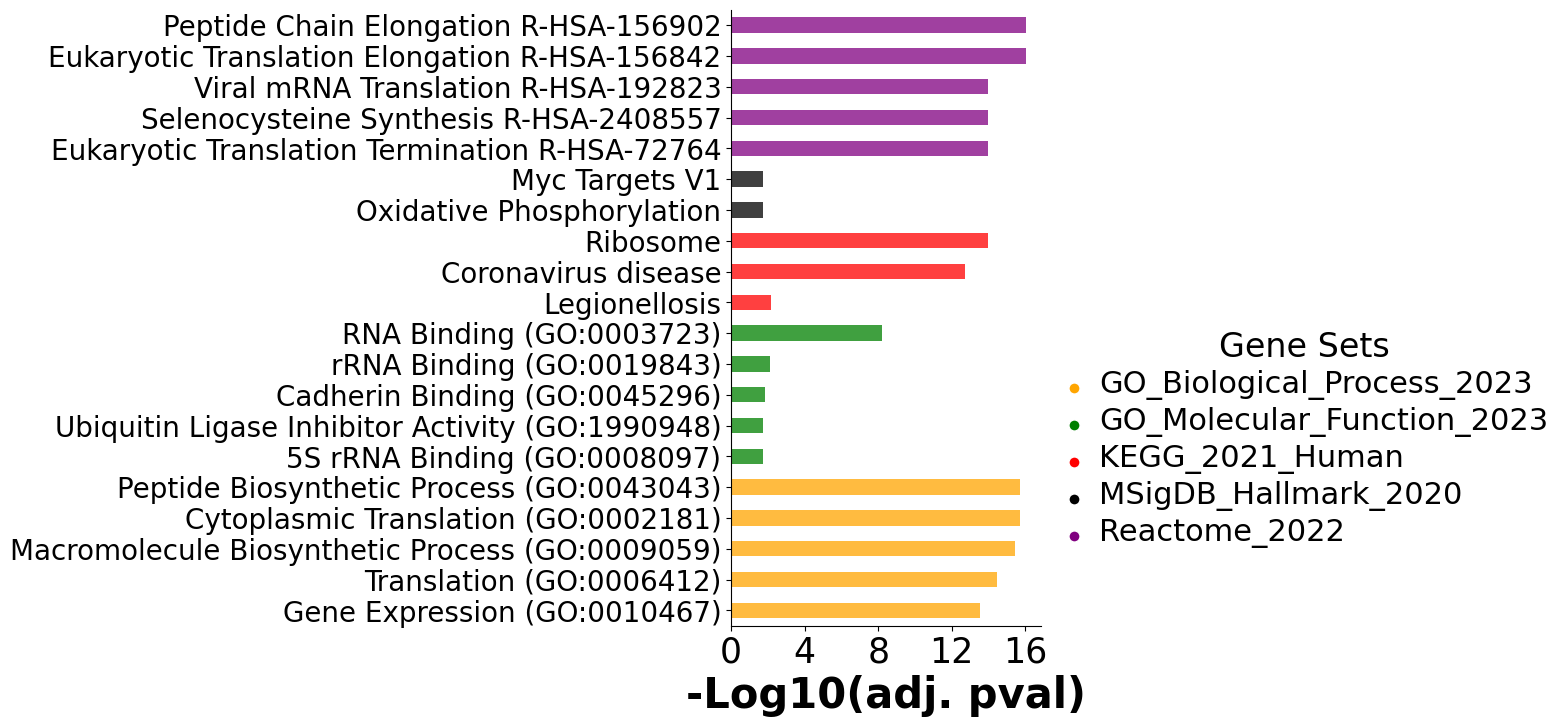

In [59]:
enr=create_enrichment_plot(_196C_leid0_1_DEG[_196C_leid0_1_DEG['Group']=='upregulated in leiden 0'].genes.to_list(),save_path='figures/196C_leiden0_up')

In [75]:
enr=create_enrichment_plot(_196C_leid0_1_DEG[_196C_leid0_1_DEG['Group']=='upregulated in leiden 1'].genes.to_list(),save_path='figures/196C_leiden1_up')

Exception: Error sending gene list, try again later

####  DEP testing b/w conditions

##### 37C vs 4C

In [63]:
_4_37C_all, _4_37C_DEG, _4_37C_DEG_genelist = calculate_differential_expression(data, group_col0='group', group_col1='group', group_col0_value='37C', 
                                                                    group_col1_value='4C', group_col0_label='37C', group_col1_label='4C',
                                                                    group0_mean='37C_mean', group1_mean='4C_mean',
                                                                    LogFC_name='37C-4C_LogFC', logfc_threshold=1, neg_log10_adj_pval_threshold=2)

In [64]:
_4_37C_DEG.Group.value_counts()

Group
upregulated in 4C     41
upregulated in 37C     4
Name: count, dtype: int64

In [74]:
_4_37C_DEG.to_csv('4C_37C_DEG.csv')
_4_37C_all.to_csv('4C_37C_all.csv')

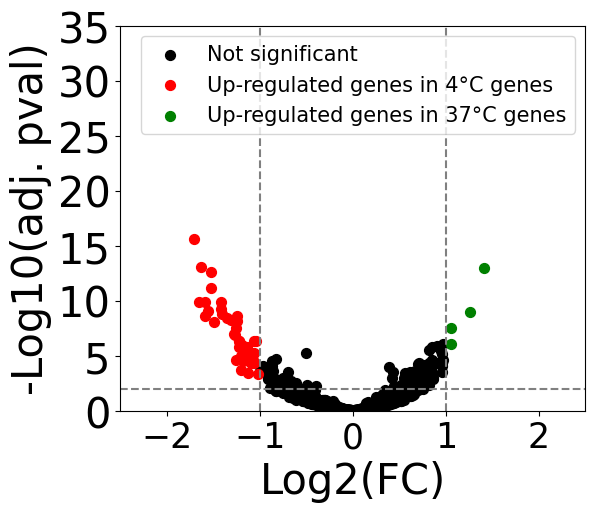

In [65]:
plot_differential_expression(_4_37C_all, logfc_col='37C-4C_LogFC', down_label='Up-regulated genes in 4°C', up_label='Up-regulated genes in 37°C', output_path='figures/Fig2B.svg')

In [66]:
data_prenorm = ad.AnnData(label_gene.iloc[:,:-1])
data_prenorm.obs["group"] = label_gene["Group"]
sc.pp.calculate_qc_metrics(data_prenorm, inplace=True)
data_prenorm.var_names_make_unique()
sc.pp.filter_cells(data_prenorm, min_genes=200)
sc.pp.filter_genes(data_prenorm, min_cells=10)
sc.pp.log1p(data_prenorm)
_4_37C_all_prenorm, _4_37C_DEG_prenorm, _4_37C_DEG_genelist_prenorm = calculate_differential_expression(data_prenorm, group_col0='group', group_col1='group', group_col0_value='37C', 
                                                                    group_col1_value='4C', group_col0_label='37C', group_col1_label='4C',
                                                                    group0_mean='37C_mean', group1_mean='4C_mean',
                                                                    LogFC_name='37C-4C_LogFC', logfc_threshold=1, neg_log10_adj_pval_threshold=2)

C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\scanpy\preprocessing\_qc.py:432: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


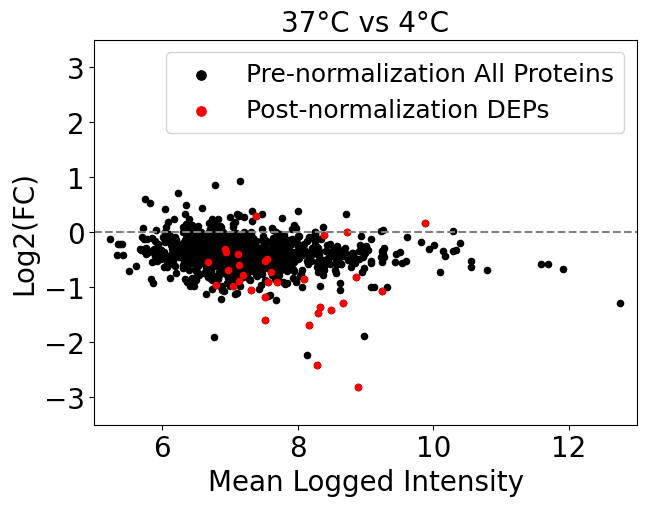

In [67]:
#MvA plot 
plt.figure(figsize=(7,5))
A = (_4_37C_all_prenorm['37C_mean']+_4_37C_all_prenorm['4C_mean'])/2
M = _4_37C_all_prenorm['37C-4C_LogFC']
plt.scatter(x=A,y=M,s=20,color='black',label='Pre-normalization All Proteins')
 
deg = _4_37C_DEG[(_4_37C_DEG['37C-4C_LogFC'].abs()>=1)&(_4_37C_DEG['adj_pval']<=0.01)]
deg_pvals=_4_37C_all_prenorm[_4_37C_all_prenorm['genes'].isin(deg.genes.to_list())]
A = (deg_pvals['37C_mean']+deg_pvals['4C_mean'])/2
M = deg_pvals['37C-4C_LogFC']
plt.scatter(x=A,y=M,s=20,color='red',label='Post-normalization DEPs')

 
plt.xticks(
    fontweight='light',
    fontsize=20)
plt.yticks(
    fontweight='light',
    fontsize=20)
plt.grid(False)
plt.title("37°C vs 4°C",fontsize=20)
plt.xlabel("Mean Logged Intensity",fontsize=20)
plt.ylabel("Log2(FC)",fontsize=20)
plt.legend(fontsize=18, markerscale=1.5)
plt.ylim(-3.5,3.5)
plt.xlim(5,13)
# Plot a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--', label='y=0')
plt.savefig('figures/37_4_MA.svg', bbox_inches='tight')
plt.show()

##### 37C vs -196C

In [68]:
_196_37C_all, _196_37C_DEG, _196_37C_DEG_genelist = calculate_differential_expression(data, group_col0='group', group_col1='group', group_col0_value='37C', 
                                                                    group_col1_value='-196C', group_col0_label='37C', group_col1_label='-196C',
                                                                    group0_mean='37C_mean', group1_mean='-196C_mean',
                                                                    LogFC_name='37C-196C_LogFC', logfc_threshold=1, neg_log10_adj_pval_threshold=2)

In [69]:
_196_37C_DEG.Group.value_counts()

Group
upregulated in -196C    64
upregulated in 37C      18
Name: count, dtype: int64

In [73]:
_196_37C_DEG.to_csv('-196C_37C_DEG.csv')
_196_37C_all.to_csv('-196C_37C_all.csv')

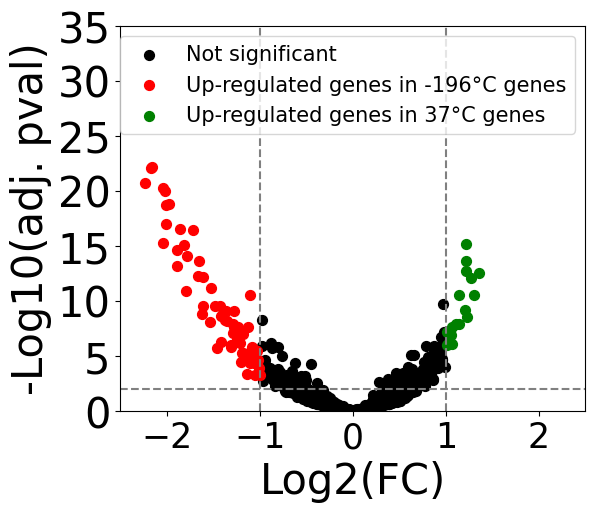

In [70]:
plot_differential_expression(_196_37C_all, logfc_col='37C-196C_LogFC', down_label='Up-regulated genes in -196°C', up_label='Up-regulated genes in 37°C', output_path='figures/Fig2C.svg')

In [71]:
data_prenorm = ad.AnnData(label_gene.iloc[:,:-1])
data_prenorm.obs["group"] = label_gene["Group"]
sc.pp.calculate_qc_metrics(data_prenorm, inplace=True)
data_prenorm.var_names_make_unique()
sc.pp.filter_cells(data_prenorm, min_genes=200)
sc.pp.filter_genes(data_prenorm, min_cells=10)
sc.pp.log1p(data_prenorm)
_196_37C_all_prenorm, _196_37C_DEG_prenorm, _196_37C_DEG_genelist_prenorm = calculate_differential_expression(data_prenorm, group_col0='group', group_col1='group', group_col0_value='37C', 
                                                                    group_col1_value='-196C', group_col0_label='37C', group_col1_label='-196C',
                                                                    group0_mean='37C_mean', group1_mean='-196C_mean',
                                                                    LogFC_name='37C-196C_LogFC', logfc_threshold=1, neg_log10_adj_pval_threshold=2)

C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\momenzadeha\Anaconda3\envs\myenv2\lib\site-packages\scanpy\preprocessing\_qc.py:432: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


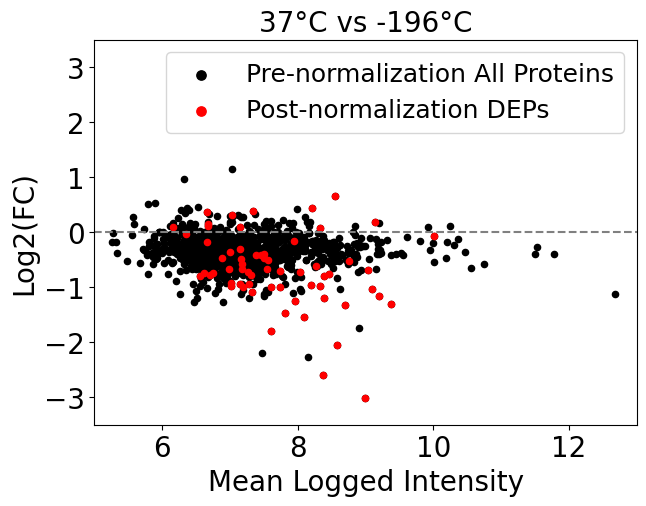

In [72]:
#MvA plot 
plt.figure(figsize=(7,5))
A = (_196_37C_all_prenorm['37C_mean']+_196_37C_all_prenorm['-196C_mean'])/2
M = _196_37C_all_prenorm['37C-196C_LogFC']
plt.scatter(x=A,y=M,s=20,color='black',label='Pre-normalization All Proteins')
 
deg = _196_37C_DEG[(_196_37C_DEG['37C-196C_LogFC'].abs()>=1)&(_196_37C_DEG['adj_pval']<=0.01)]
deg_pvals=_196_37C_all_prenorm[_196_37C_all_prenorm['genes'].isin(deg.genes.to_list())]
A = (deg_pvals['37C_mean']+deg_pvals['-196C_mean'])/2
M = deg_pvals['37C-196C_LogFC']
plt.scatter(x=A,y=M,s=20,color='red',label='Post-normalization DEPs')

 
plt.xticks(
    fontweight='light',
    fontsize=20)
plt.yticks(
    fontweight='light',
    fontsize=20)
plt.grid(False)
plt.title("37°C vs -196°C",fontsize=20)
plt.xlabel("Mean Logged Intensity",fontsize=20)
plt.ylabel("Log2(FC)",fontsize=20)
plt.legend(fontsize=18, markerscale=1.5)
plt.ylim(-3.5,3.5)
plt.xlim(5,13)
# Plot a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--', label='y=0')
plt.savefig('figures/37_196_MA.svg', bbox_inches='tight')
plt.show()

#### Overlap among DEGs across conditions

In [37]:
#pip install matplotlib-venn

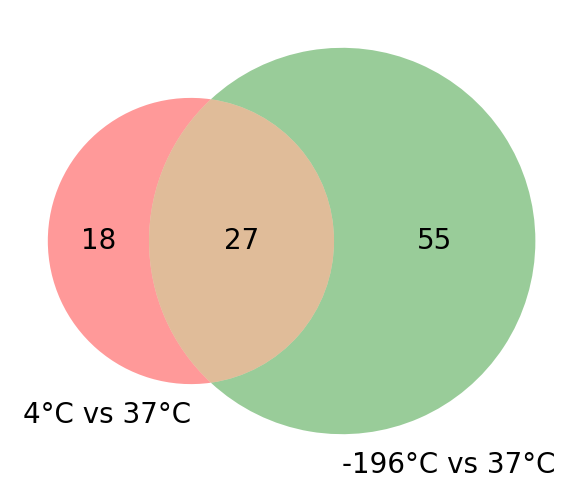

In [77]:
set1=set(_4_37C_DEG_genelist)
set2=set(_196_37C_DEG_genelist)
plt.figure(figsize=(8, 6))
venn = venn2([set1, set2], set_labels=('4°C vs 37°C','-196°C vs 37°C'))
for text in venn.set_labels:
    if text:  
        text.set_fontsize(20)

for text in venn.subset_labels:
    if text:  
        text.set_fontsize(20)

plt.savefig('figures/venn_DEG_overlap.svg', bbox_inches='tight')

#### Pathway analysis

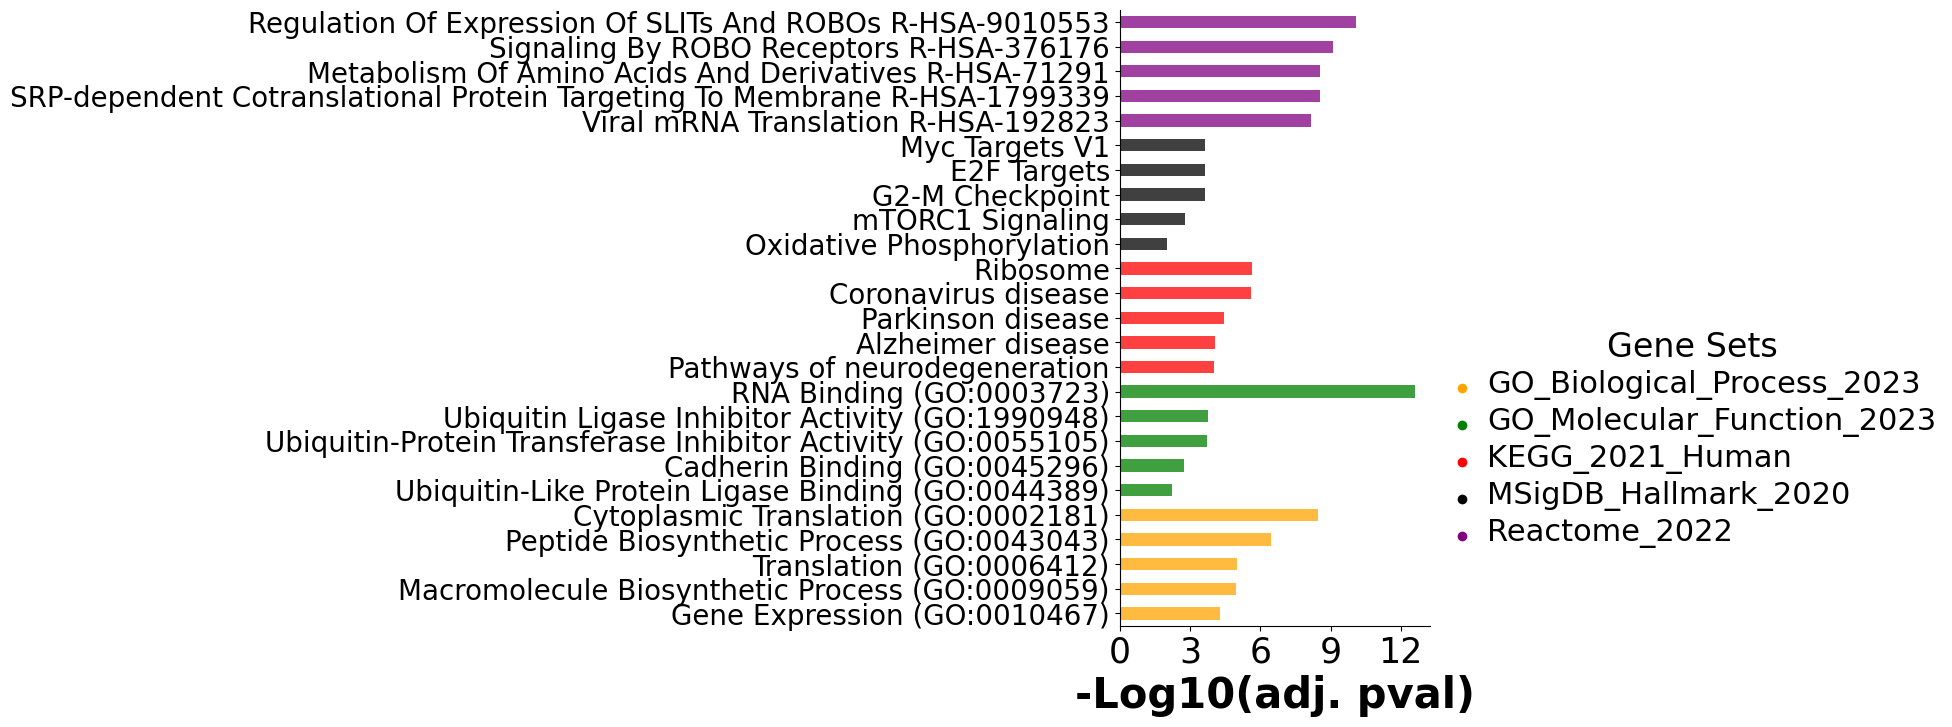

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_29204\2104008092.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)


In [112]:
enr=create_enrichment_plot(gene_list=_196_37C_DEG_genelist, save_path='figures/196C_37C_DEG_pathways')
enr.results['neg_log10(adj.pval)']=-1*np.log10(enr.results['Adjusted P-value'])
top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)
top_5_per_set.to_csv('_196_37_pathways.csv')

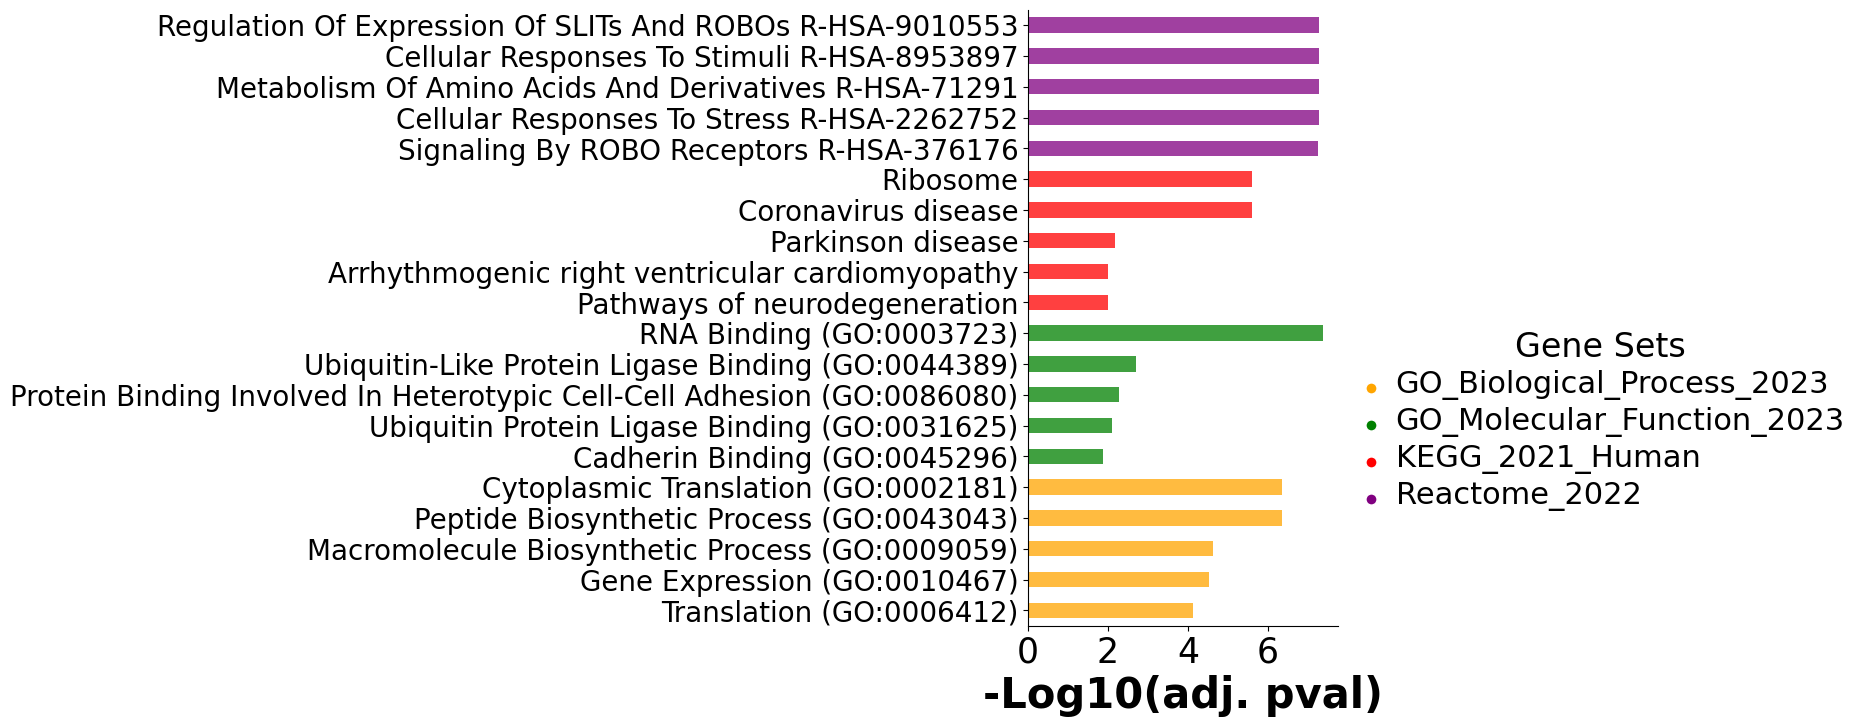

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_29204\4003600377.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)


In [113]:
enr=create_enrichment_plot(gene_list=_4_37C_DEG_genelist, save_path='figures/4C_37C_DEG_pathways')
enr.results['neg_log10(adj.pval)']=-1*np.log10(enr.results['Adjusted P-value'])
top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)
top_5_per_set.to_csv('_4_37_pathways.csv')

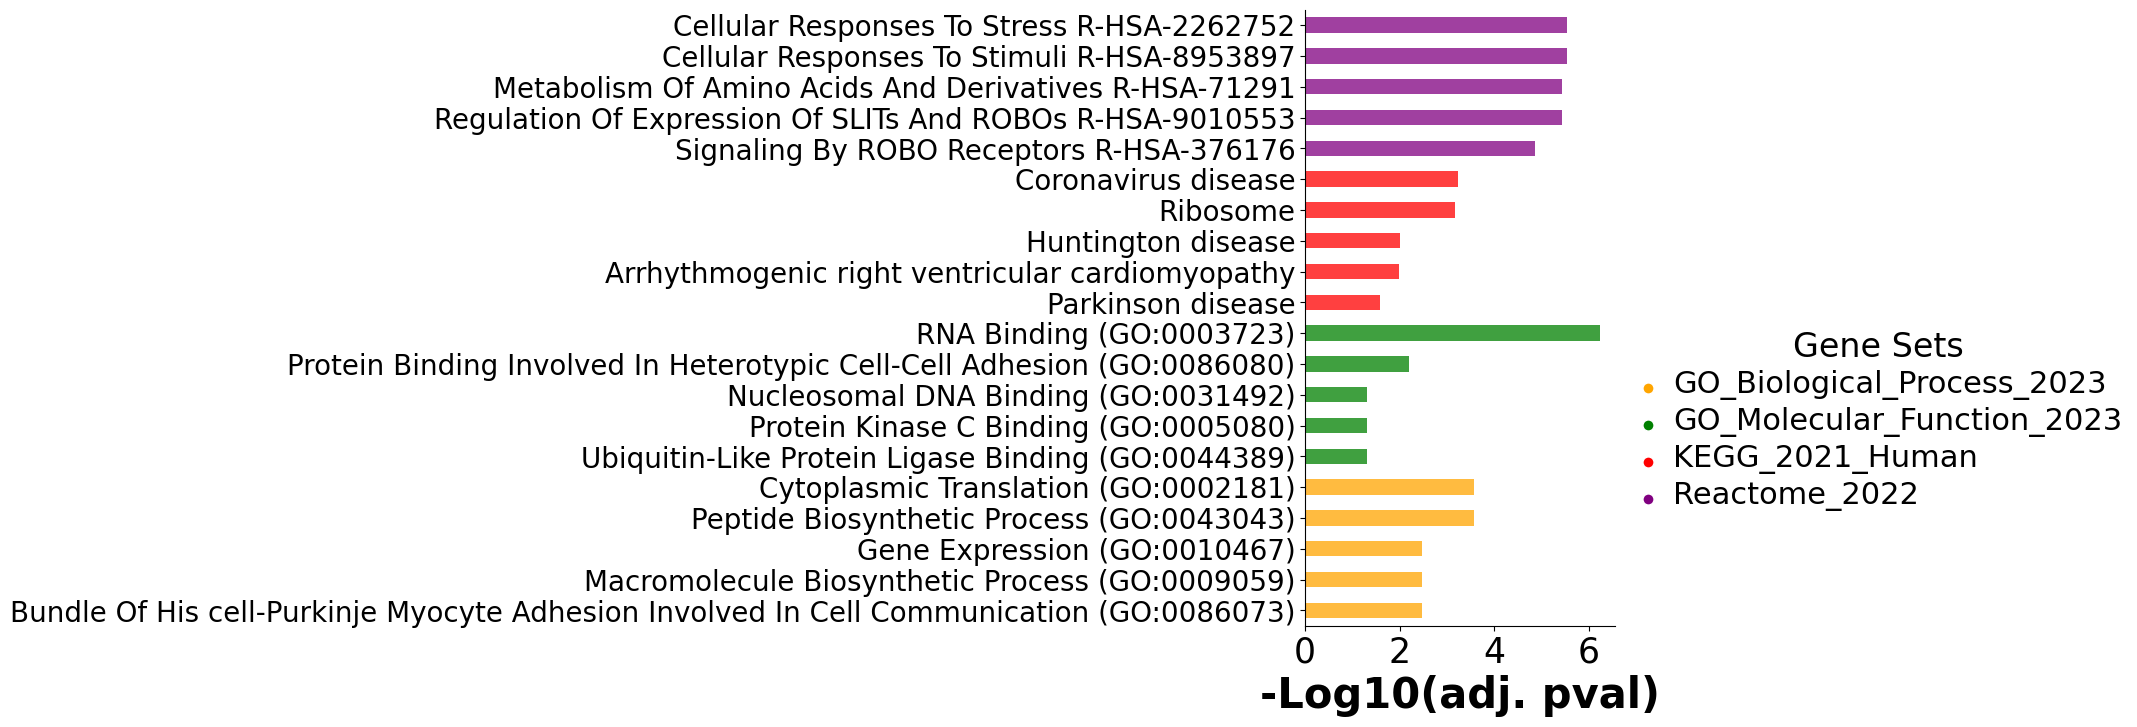

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_29204\3318098881.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)


In [114]:
enr=create_enrichment_plot(gene_list=_4_37C_DEG[_4_37C_DEG['Group']=='upregulated in 4C'].genes.to_list(), save_path='figures/up4C_DEG_pathways')
enr.results['neg_log10(adj.pval)']=-1*np.log10(enr.results['Adjusted P-value'])
top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)
top_5_per_set.to_csv('_up4C_pathways.csv')

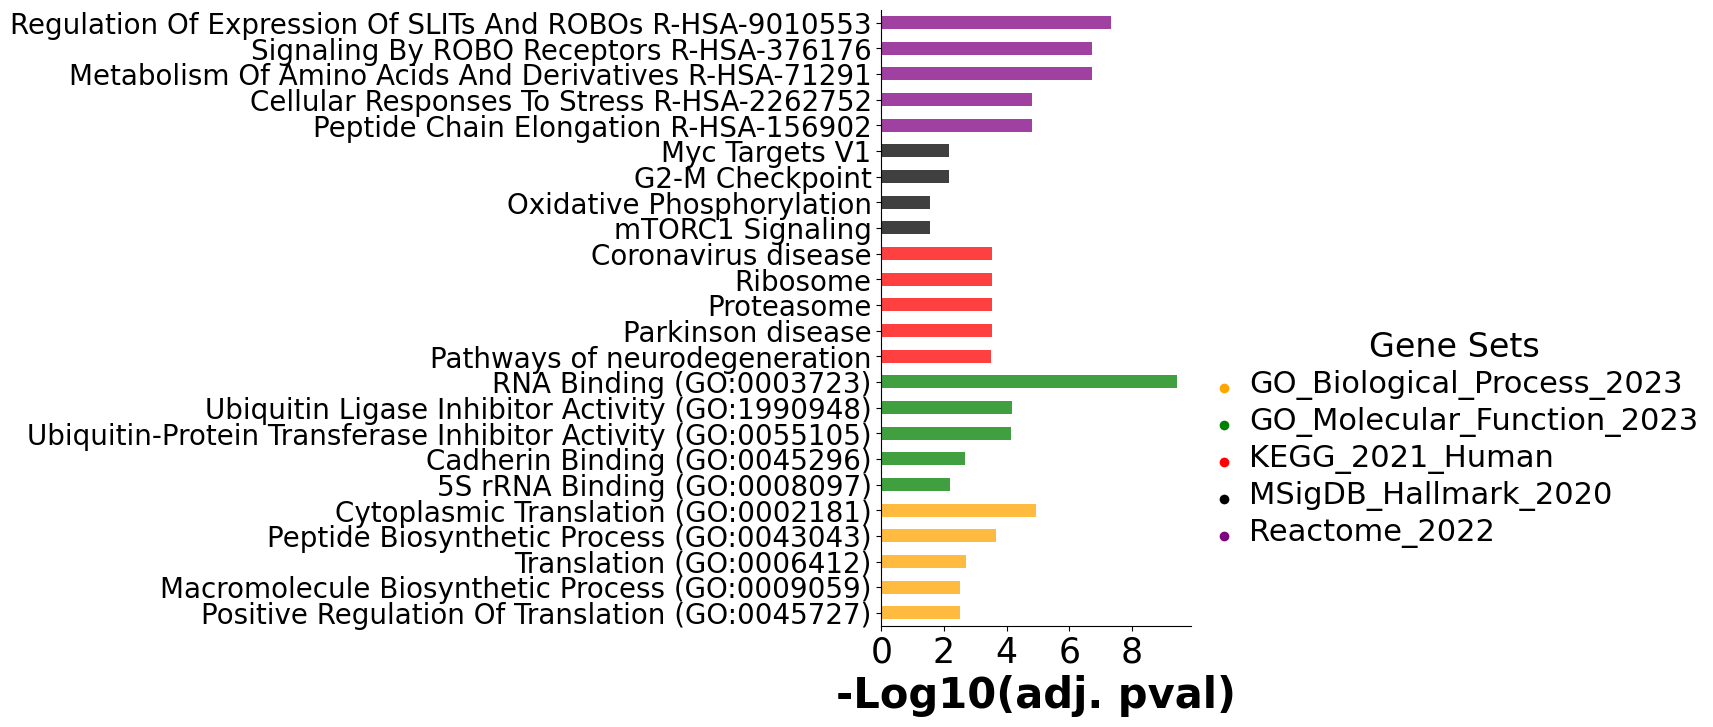

C:\Users\momenzadeha\AppData\Local\Temp\ipykernel_29204\2587795081.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)


In [118]:
enr=create_enrichment_plot(gene_list=_196_37C_DEG[_196_37C_DEG['Group']=='upregulated in -196C'].genes.to_list(), save_path='figures/up-196C_DEG_pathways')
enr.results['neg_log10(adj.pval)']=-1*np.log10(enr.results['Adjusted P-value'])
top_5_per_set = enr.results.groupby('Gene_set').apply(lambda x: x.nlargest(5, 'neg_log10(adj.pval)')).reset_index(drop=True)
top_5_per_set.to_csv('_up196C_pathways.csv')

#### Heatmaps

In [79]:
#all unique proteins in either list
overlap = set(_4_37C_DEG_genelist+_196_37C_DEG_genelist)

In [80]:
len(overlap)

100

In [81]:
oxphos=['TIMM13','CYC1','SDHA','SLC25A5','DLD','ATP5MF','SLC25A6','SLC25A3','MDH1','COX17','UQCRC1','TIMM13','VDAC3','ETFA','SDHA','DLD','ATP5MF',
'SLC25A6']

In [82]:
transl=['RPL5','RPS17','RPL21','RPL10','RPS5','RPL37A','RPLP2','RPL27','RPL15','RPL29','RPS27A','TUFM','RPL5','HARS1','RPL31','RPS5','RPL22','RPL11','RPL8','RPL10A','RPL18A','RPL37A','RACK1','RPLP2','RPL15','RPL29','RPS27A']

In [83]:
sel_transl = list(set(overlap) & set(transl))

In [84]:
sel_oxphos = list(set(overlap) & set(oxphos))

In [85]:
obs=data.obs['group'].reset_index()

In [86]:
tc_norm.reset_index(inplace=True)

In [87]:
merge=obs.merge(tc_norm, on='index',how='inner')

In [88]:
merge.set_index('index', inplace=True)

In [89]:
# Function to calculate the average of non-zero values
def avg_non_zero(series):
    non_zero_values = series[series != 0]
    if len(non_zero_values) > 0:
        return non_zero_values.mean()
    else:
        return np.nan

# Group by temperature and apply the avg_non_zero function
result = merge.groupby('group').apply(avg_non_zero)

In [90]:
result.to_csv('mean_quant.csv')

In [91]:
oxphos_result=result[sel_oxphos]

In [92]:
transl_result=result[sel_transl]

In [93]:
oxphos_result

SLC25A3    UQCRC1     VDAC3    TIMM13   SLC25A6   SLC25A5      CYC1
group                                                                      
4C    -0.046585 -0.115623  0.210784  0.326134  0.153846  0.532849  0.792565
37C   -0.559045 -0.523000  0.476492 -0.946577 -0.749114 -0.695767 -0.359798
-196C  0.501690  0.539820 -0.574276  0.536538  0.500855  0.013295 -0.436958

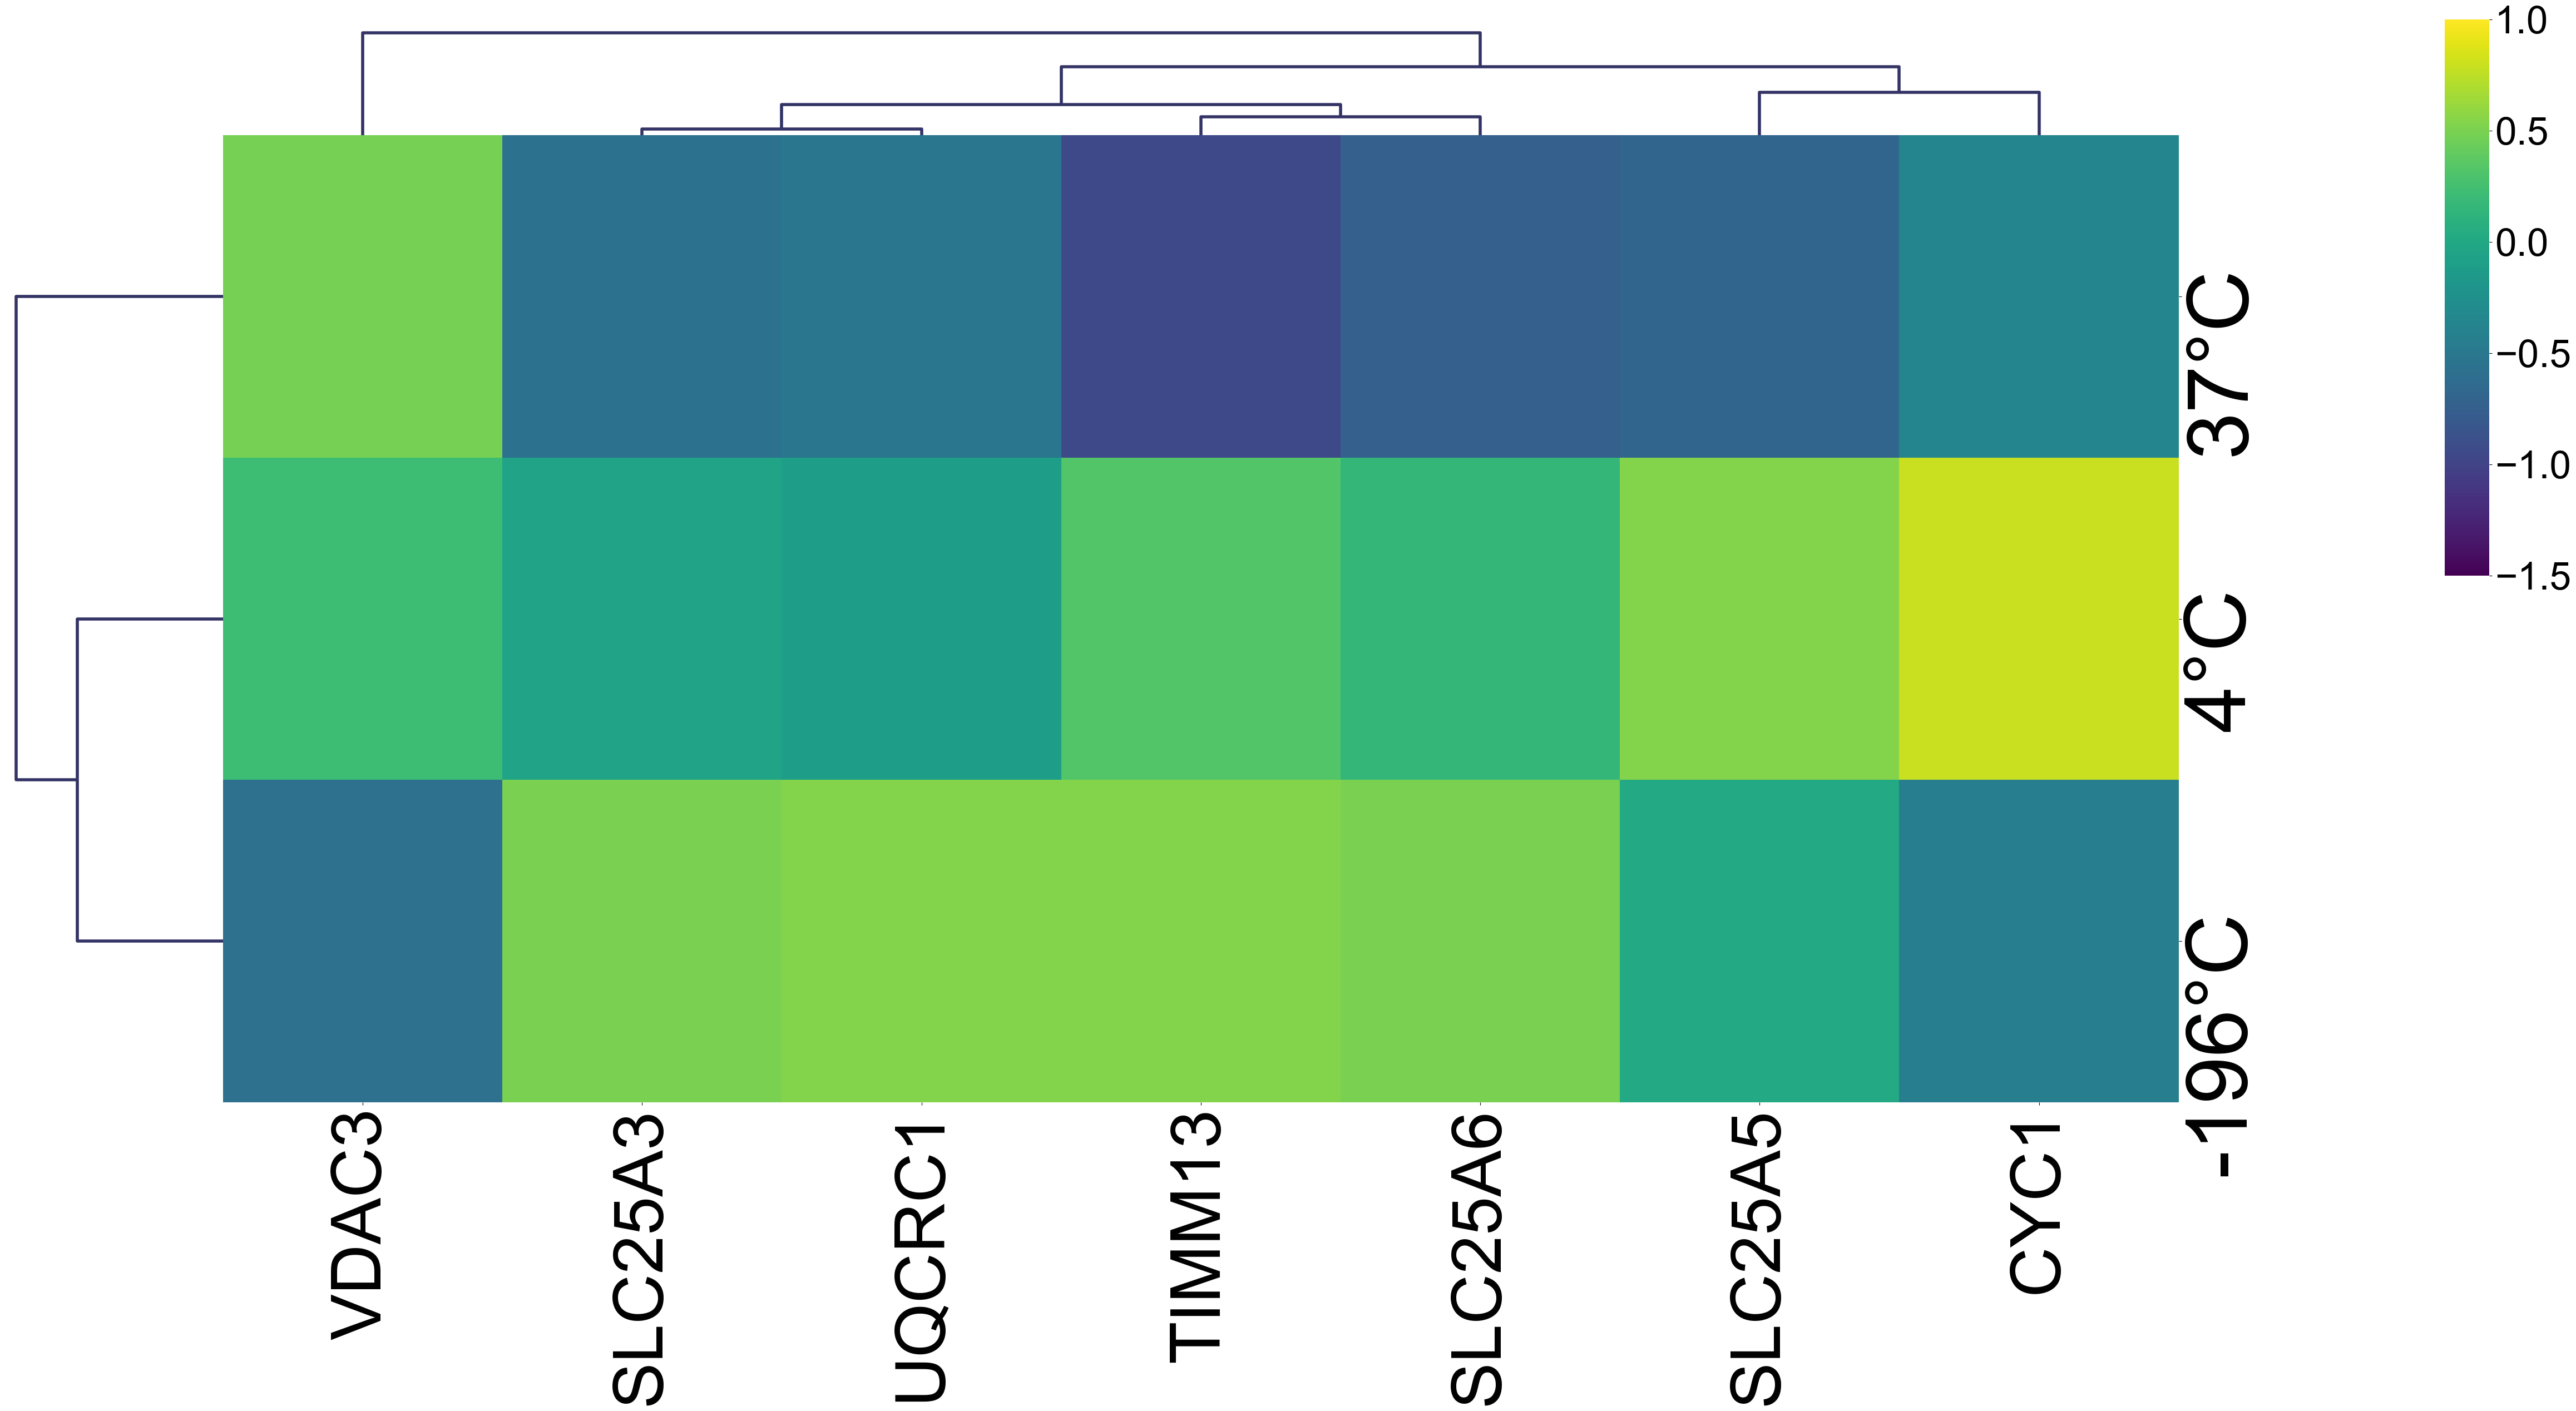

In [94]:
# Manually define the labels for the vertical axis
yticklabels = ['37°C', '4°C', '-196°C']  # Replace with your actual labels

# Create the clustermap
ax = sns.clustermap(oxphos_result.fillna(0),
                     figsize=(40, 20),
                     cbar_pos=(1.1, 0.5, 0.02, 0.5), 
                     row_cluster=True,
                     col_cluster=True,
                     annot=False,
                     cbar_kws={'shrink': 5},
                     tree_kws=dict(linewidths=4, colors=(0.2, 0.2, 0.4)),
                     dendrogram_ratio=(0.1, 0.1),
                     cmap='viridis', vmin=-1.5, vmax=1)

# Adjust colorbar tick label size
cbar = ax.cax
cbar.tick_params(labelsize=50)

# Set font scale for the plot
sns.set(font_scale=3)

# Adjust x-tick labels
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), fontsize=90, rotation=90)

# Manually set the y-tick labels with custom labels
ax.ax_heatmap.set_yticklabels(yticklabels, fontsize=110)

# Remove the y-axis label
ax.ax_heatmap.set_ylabel('')  # Empty string to hide the label

# Save and display the plot
plt.savefig('figures/heatmap_oxphos.svg', bbox_inches='tight')
plt.show()


In [95]:
col_order = ax.dendrogram_col.reordered_ind
ordered_columns = oxphos_result.columns[col_order]

In [96]:
ordered_columns_lst=ordered_columns.to_list()

In [97]:
ordered_columns_lst.append('group')

In [98]:
melt=merge[ordered_columns_lst].melt(id_vars='group')

In [99]:
melt_nonzero=melt.loc[(melt != 0).all(axis=1)]

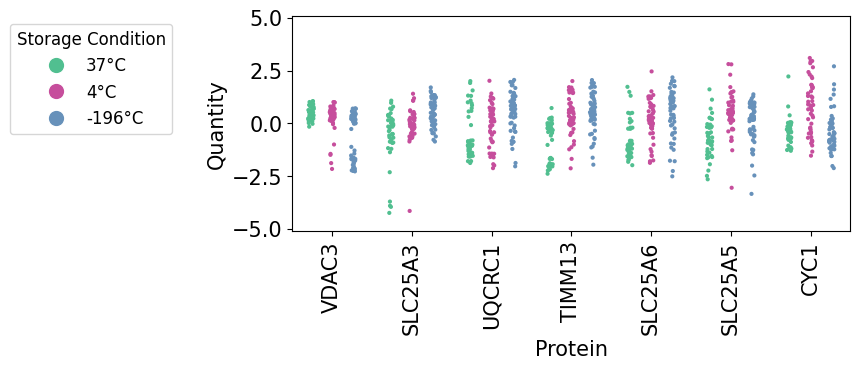

In [104]:
sns.reset_defaults()

plt.figure(figsize=(7.2, 2.8))

# Define custom colors for each group
custom_palette = ["#51BF90", "#C64E9C", "#6791BA"]

# Create the stripplot
ax = sns.stripplot(data=melt_nonzero, x="variable", y='value', hue='group', hue_order=["37C", "4C", "-196C"], 
                   dodge=True, palette=custom_palette, size=3)

# Set labels and customize ticks
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Quantity', fontsize=15)
ax.set_xlabel('Protein', fontsize=15)
ax.set_facecolor('white')

plt.ylim(-5.1, 5.1)
plt.gcf().set_facecolor('white')
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Create custom legend handles and labels
legend_labels = ['37°C', '4°C', '-196°C']  # Customize as needed
legend_colors = custom_palette  # Colors for each group

# Create custom legend handles using Line2D with larger markers
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=12) for color in legend_colors]

# Add the legend with custom handles and labels, and larger markers
plt.legend(handles=legend_handles, labels=legend_labels, title="Storage Condition", 
           title_fontsize='large', fontsize="large", bbox_to_anchor=(-0.2, 1), loc='upper right')

# Save and display the plot
plt.savefig('figures/stripplot_oxphos.svg', bbox_inches='tight')
plt.show()

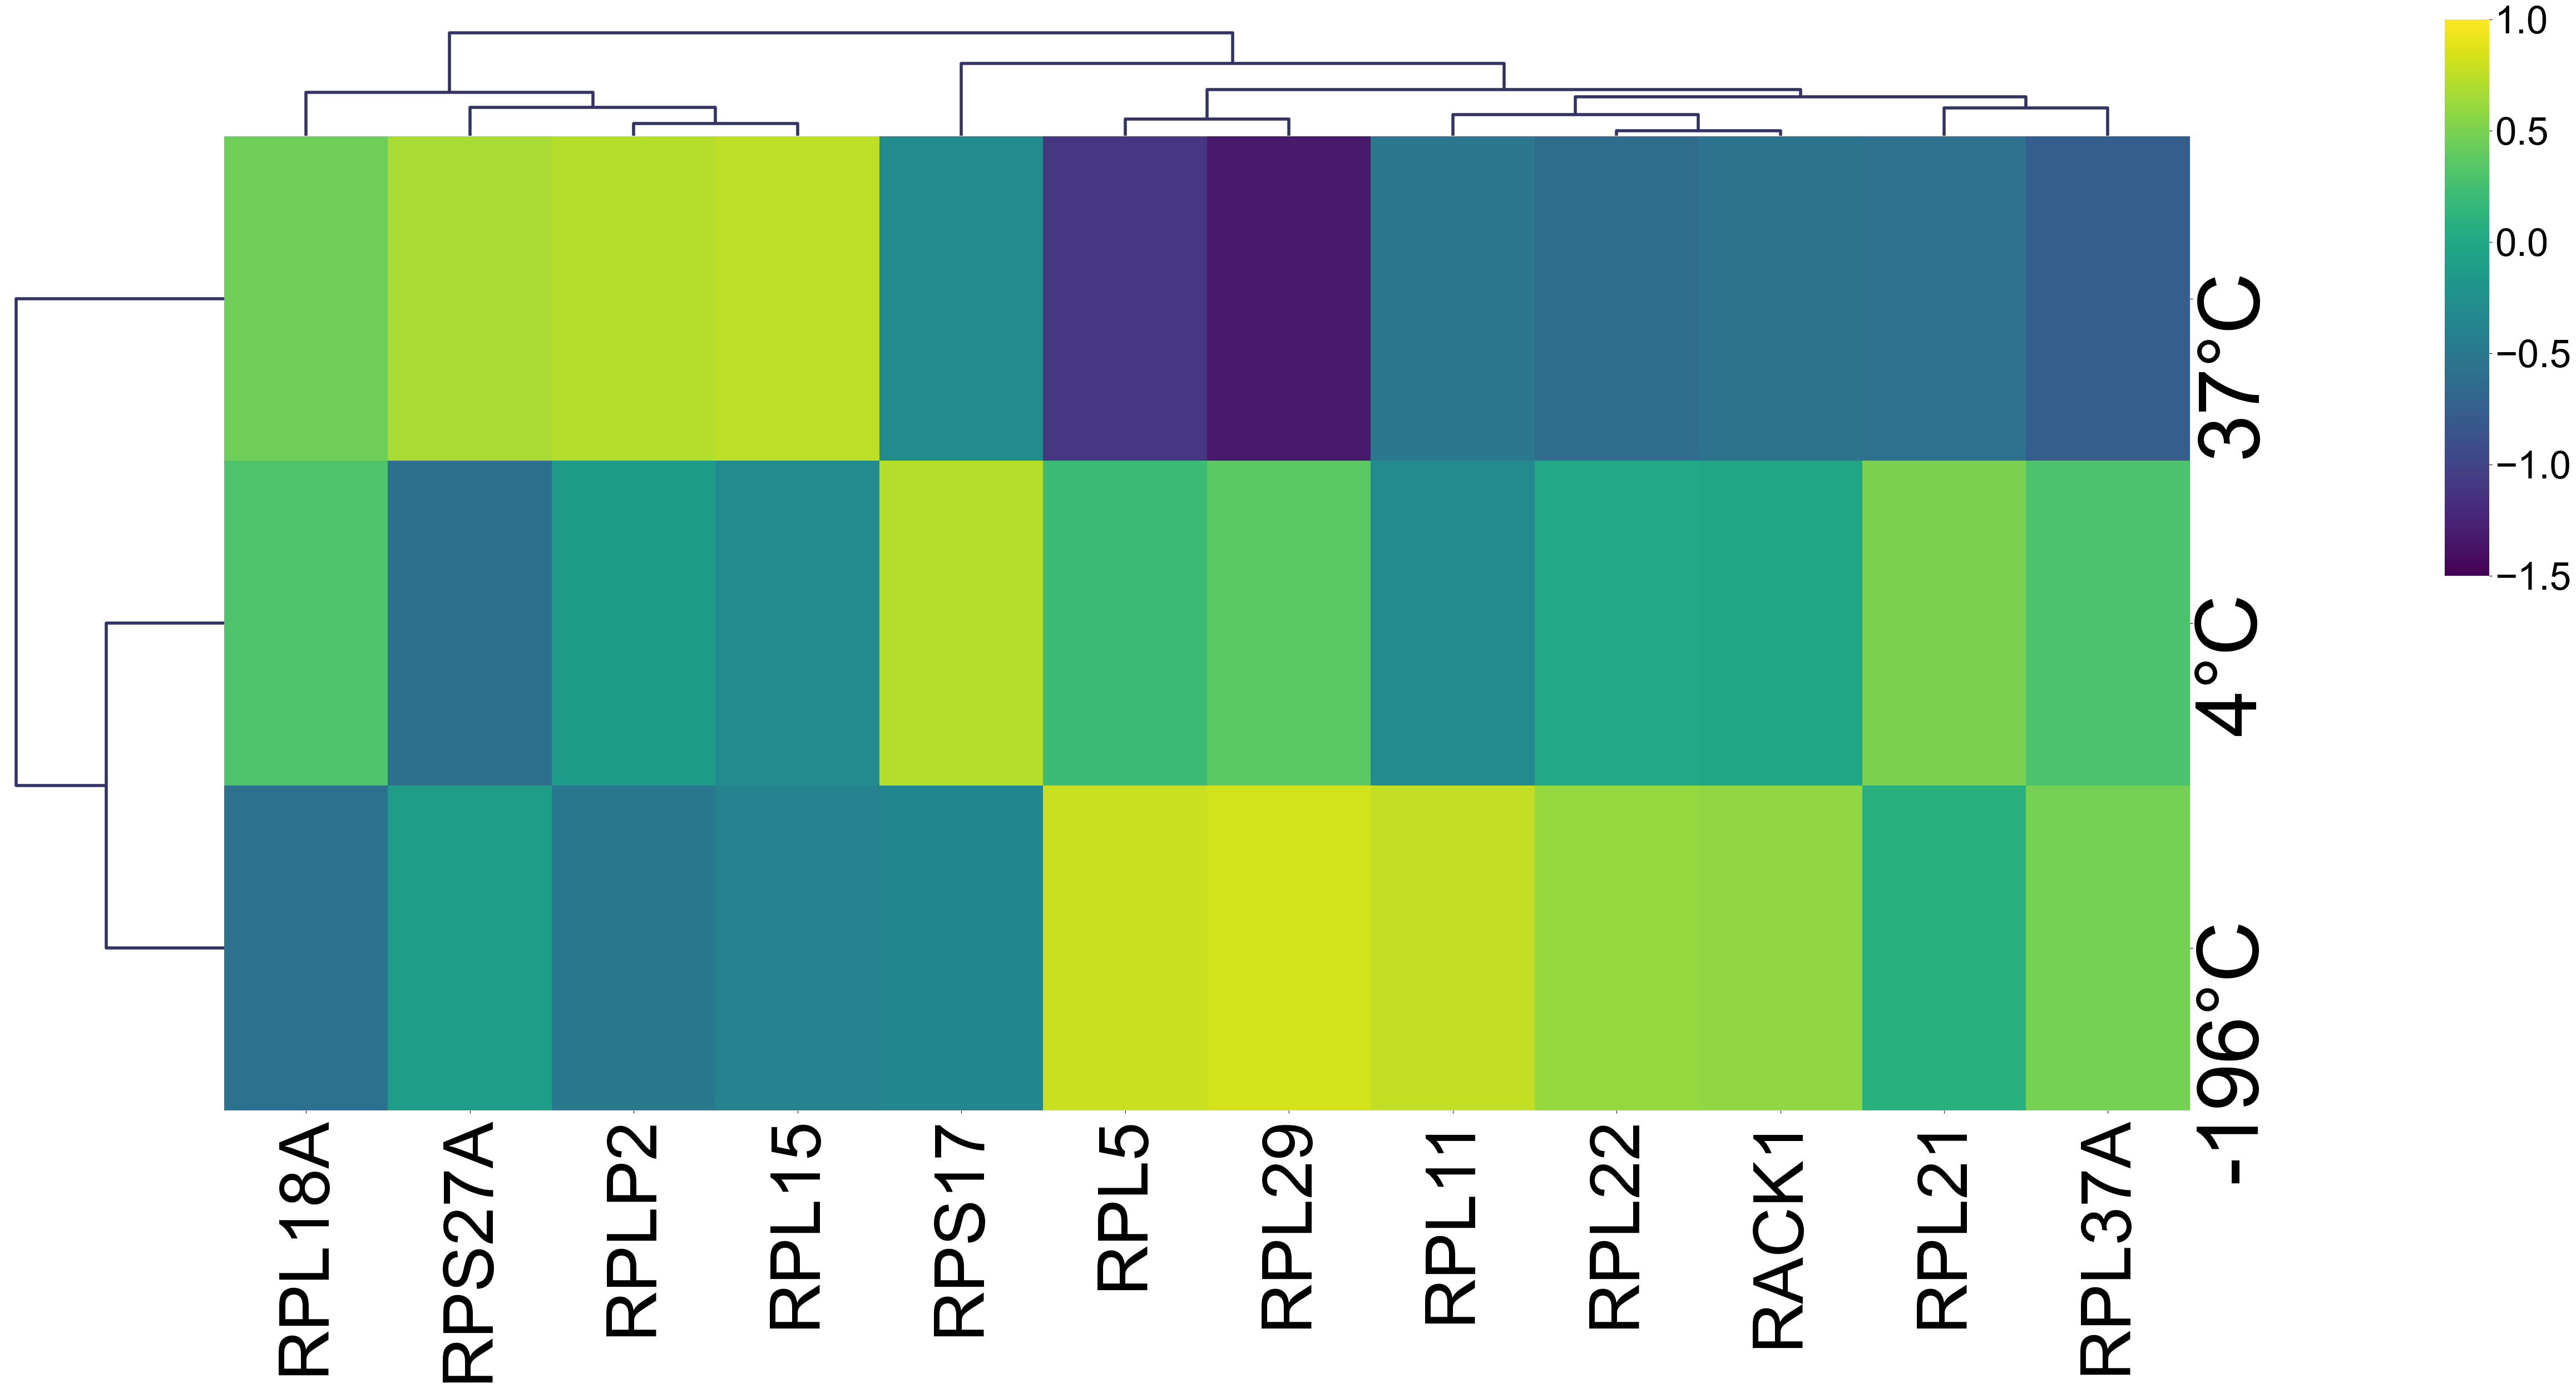

In [105]:
# Manually define the labels for the vertical axis
yticklabels = ['37°C', '4°C', '-196°C']  # Replace with your actual labels

# Create the clustermap
ax = sns.clustermap(transl_result.fillna(0),
                     figsize=(40, 20),
                     cbar_pos=(1.1, 0.5, 0.02, 0.5), 
                     row_cluster=True,
                     col_cluster=True,
                     annot=False,
                     cbar_kws={'shrink': 5},
                     tree_kws=dict(linewidths=4, colors=(0.2, 0.2, 0.4)),
                     dendrogram_ratio=(0.1, 0.1),
                     cmap='viridis', vmin=-1.5, vmax=1)

# Adjust colorbar tick label size
cbar = ax.cax
cbar.tick_params(labelsize=50)

# Set font scale for the plot
sns.set(font_scale=3)

# Adjust x-tick labels
ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), fontsize=90, rotation=90)

# Manually set the y-tick labels with custom labels
ax.ax_heatmap.set_yticklabels(yticklabels, fontsize=110)

# Remove the y-axis label
ax.ax_heatmap.set_ylabel('')  # Empty string to hide the label

# Save and display the plot
plt.savefig('figures/heatmap_transl.svg', bbox_inches='tight')
plt.show()


In [106]:
col_order = ax.dendrogram_col.reordered_ind
ordered_columns = transl_result.columns[col_order]

In [107]:
ordered_columns_lst=ordered_columns.to_list()

In [108]:
ordered_columns_lst.append('group')

In [109]:
melt=merge[ordered_columns_lst].melt(id_vars='group')

In [110]:
melt_nonzero=melt.loc[(melt != 0).all(axis=1)]

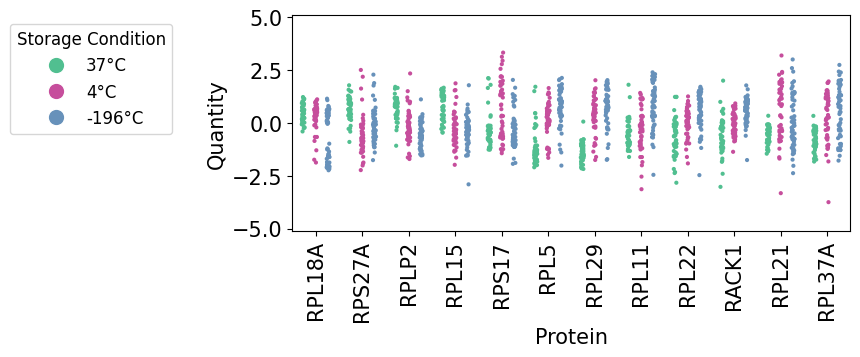

In [111]:
sns.reset_defaults()

plt.figure(figsize=(7.2, 2.8))

# Define custom colors for each group
custom_palette = ["#51BF90", "#C64E9C", "#6791BA"]

# Create the stripplot
ax = sns.stripplot(data=melt_nonzero, x="variable", y='value', hue='group', hue_order=["37C", "4C", "-196C"], 
                   dodge=True, palette=custom_palette, size=3)

# Set labels and customize ticks
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Quantity', fontsize=15)
ax.set_xlabel('Protein', fontsize=15)
ax.set_facecolor('white')

plt.ylim(-5.1, 5.1)
plt.gcf().set_facecolor('white')
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Create custom legend handles and labels
legend_labels = ['37°C', '4°C', '-196°C']  # Customize as needed
legend_colors = custom_palette  # Colors for each group

# Create custom legend handles using Line2D with larger markers
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=12) for color in legend_colors]

# Add the legend with custom handles and labels, and larger markers
plt.legend(handles=legend_handles, labels=legend_labels, title="Storage Condition", 
           title_fontsize='large', fontsize="large", bbox_to_anchor=(-0.2, 1), loc='upper right')

# Save and display the plot
plt.savefig('figures/stripplot_transl.svg', bbox_inches='tight')
plt.show()